## Notebook 8 - Extra plots

In this notebook, we analyse the lysate-based screening results in various ways, including comparing our results with those of Yang et al.

In [ ]:
%run ../common.py

In [2]:
from venn import venn
plt.rcParams['figure.figsize'] = [7, 5]
sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
def savefig(filename):
    plt.savefig(filepath_results + f'figures/{filename}.svg', 
                format='svg', 
                bbox_inches='tight', 
                pad_inches=0, 
                facecolor='white', 
                edgecolor='white')
    plt.show()

## Part 1 - Comparison with Yang et al. results

Let us first prepare the results from those in Yang et al. paper:

In [4]:
gtpredict_df = pd.read_csv('../data/GT_predict/GTPredictResults.csv' )

In [5]:
gtpredict_df.dropna(subset=['Half InChiKey'], inplace=True)
gtpredict_df.drop(columns='Name', inplace=True)
gtpredict_df.set_index('Half InChiKey', inplace=True)
gtpredict_df.rename_axis(None, inplace=True)

In [6]:
enzyme_names = [enzyme_name[3:] for enzyme_name in gtpredict_df.columns.values]
enzyme_names[-1] = 'WT'
gtpredict_df.columns = enzyme_names

In [7]:
gtpredict_df

71C1  71C2  71C3  71C4  71C5  71D1  71G1  71B8  71B6  71B5  \
RZPAKFUAFGMUPI   0.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   0.0   0.0   
FXNFHKRTJBSTCS   0.0   0.0   2.0   1.0   1.0   NaN   NaN   2.0   2.0   2.0   
ORHBXUUXSCNDEV   0.0   0.0   0.0   1.0   0.0   NaN   NaN   0.0   1.0   0.0   
HSHNITRMYYLLCV   0.0   1.0   0.0   0.0   2.0   NaN   NaN   0.0   1.0   0.0   
PCMORTLOPMLEFB   2.0   2.0   0.0   0.0   0.0   NaN   NaN   0.0   0.0   0.0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
VZXOZSQDJJNBRC   0.0   1.0   0.0   0.0   0.0   NaN   NaN   0.0   0.0   NaN   
YSXXAMORSGVFKZ   0.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   0.0   NaN   
RFCQDOVPMUSZMN   0.0   1.0   0.0   0.0   0.0   NaN   NaN   0.0   0.0   NaN   
FOXFZRUHNHCZPX   0.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   0.0   NaN   
NQQVFXUMIDALNH   0.0   0.0   0.0   0.0   0.0   NaN   NaN   0.0   0.0   NaN   

                ...  76E1  76E2  76E12  76E11  76C4  B5A5  85A4  78D2  78D1  \
RZPAKFUAFGMUPI  ...   0.0   0.0    0.0    0.0   NaN   0.0   0.0   0.0   0.0   
FXNFHKRTJBSTCS  ...   2.0   2.0    2.0    0.0   2.0   2.0   2.0   2.0   0.0   
ORHBXUUXSCNDEV  ...   0.0   0.0    1.0    2.0   1.0   0.0   0.0   1.0   0.0   
HSHNITRMYYLLCV  ...   0.0   1.0    2.0    2.0   0.0   0.0   0.0   2.0   0.0   
PCMORTLOPMLEFB  ...   0.0   0.0    0.0    0.0   0.0   0.0   0.0   1.0   0.0   
...             ...   ...   ...    ...    ...   ...   ...   ...   ...   ...   
VZXOZSQDJJNBRC  ...   0.0   0.0    0.0    1.0   NaN   NaN   0.0   0.0   NaN   
YSXXAMORSGVFKZ  ...   0.0   0.0    0.0    0.0   NaN   NaN   0.0   0.0   NaN   
RFCQDOVPMUSZMN  ...   0.0   0.0    0.0    0.0   NaN   NaN   0.0   0.0   NaN   
FOXFZRUHNHCZPX  ...   0.0   0.0    0.0    0.0   NaN   NaN   0.0   0.0   NaN   
NQQVFXUMIDALNH  ...   0.0   0.0    0.0    0.0   NaN   NaN   0.0   0.0   NaN   

                 WT  
RZPAKFUAFGMUPI  0.0  
FXNFHKRTJBSTCS  2.0  
ORHBXUUXSCNDEV  2.0  
HSHNITRMYYLLCV  2.0  
PCMORTLOPMLEFB  0.0  
...             ...  
VZXOZSQDJJNBRC  NaN  
YSXXAMORSGVFKZ  NaN  
RFCQDOVPMUSZMN  NaN  
FOXFZRUHNHCZPX  NaN  
NQQVFXUMIDALNH  NaN  

[91 rows x 55 columns]

Let us convert the dataframe into two lists of actives and inactives:

In [8]:
gtpredict_actives = []
gtpredict_inactives = []

enzyme_names = gtpredict_df.columns.values

for idx, row in gtpredict_df.iterrows():
    a = enzyme_names[row>0]
    tmp = [idx + '_' + e_name for e_name in a]
    gtpredict_actives.extend(tmp)
    
    ia = enzyme_names[row==0]
    tmp = [idx + '_' + e_name for e_name in ia]
    gtpredict_inactives.extend(tmp)
    
gtpredict_actives = set(gtpredict_actives)
gtpredict_inactives = set(gtpredict_inactives) - gtpredict_actives

Let us read the results from our lysate-based screening and comparing the two studies:

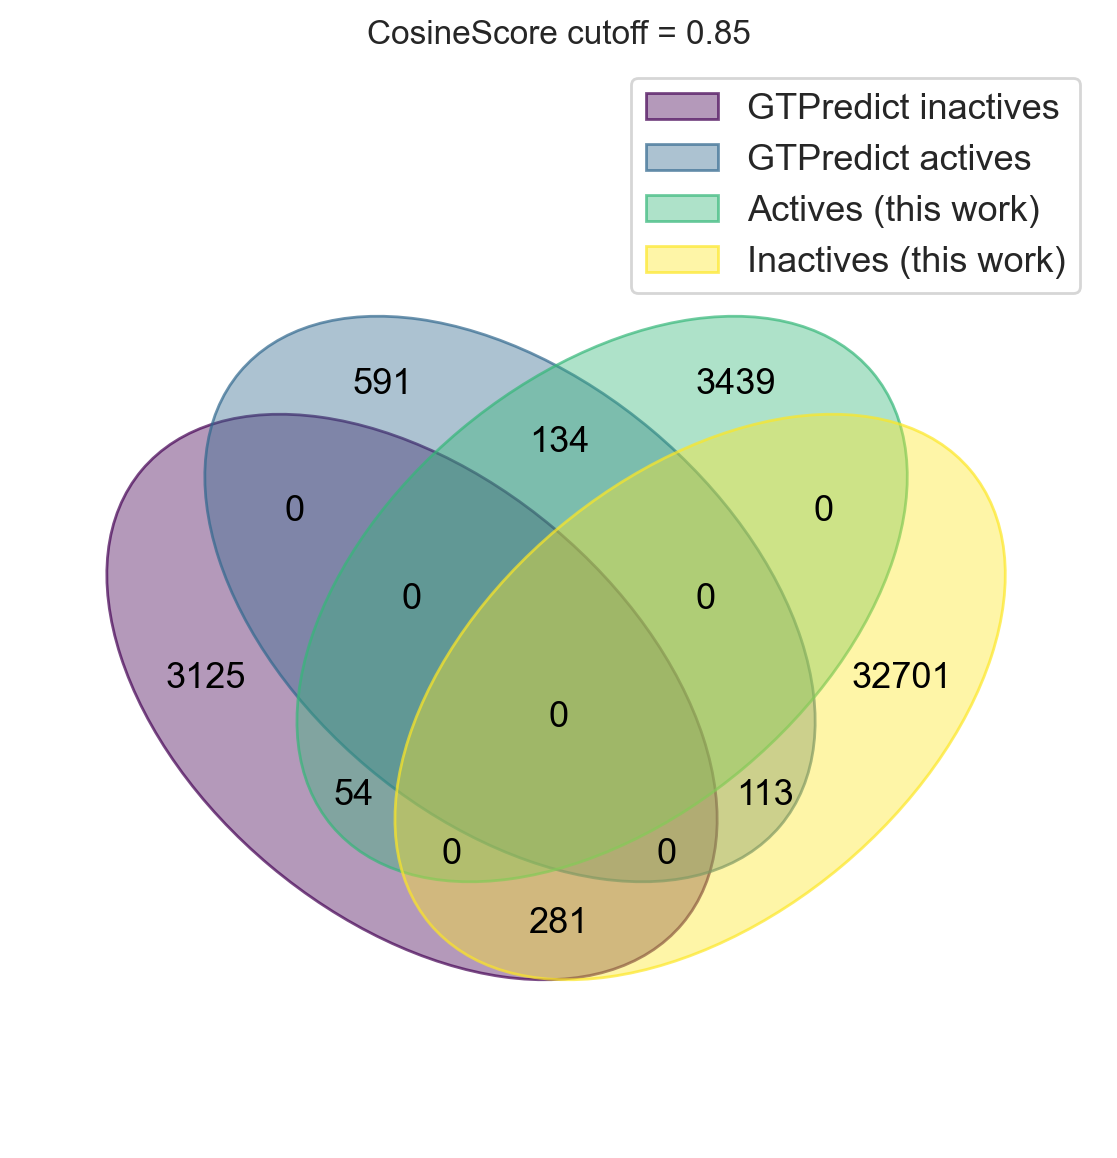

In [9]:
### Supplementary figure 4

df_substrates = pd.read_csv(filepath_results + 'Substrates_VB_clean.csv', encoding='utf8')
df_substrates = df_substrates.drop_duplicates(subset='Name').reset_index(drop=True)
del df_substrates['Mix']

for cutoff in [0.85]:

    df = pd.read_csv(filepath_results + f'/All_singlesordoubles_{cutoff}.csv', encoding='utf8')
    mapa = dict(zip(df_substrates['CSMILES'], df_substrates['ik_MoNA']))

    actives = []
    inactives = []

    for i, row in df.iterrows():
        tmp = mapa[row['CSMILES']] + '_' + row['Enzyme_name']
        if row['AUC'] > 0:
            actives.append(tmp)
        else:
            inactives.append(tmp)

    actives = set(actives)
    inactives = set(inactives) - actives

    sets = {
        "GTPredict inactives": gtpredict_inactives,
        "GTPredict actives": gtpredict_actives,
        "Actives (this work)": actives,
        "Inactives (this work)": inactives,
    }
    venn(sets, figsize=(7, 7))
    plt.title(f'CosineScore cutoff = {cutoff}')
    savefig(f'venn_{cutoff}')

When we look at the intersection of our work and GTPredict, we see that the majority of enzyme-substrate pairs that we claim to be active, are also in the active set in GTPredict, and the majority of inactive enzyme-substrate pairs are in the inactive set in GTPredict.

In [10]:
len(set(mapa.values()).intersection(gtpredict_df.index))

17

## Part 2 - Promiscuity and preferences of enzymes

### Single glucosides identified

We first tally the number of monoglucoside products generated by each enzyme:

In [11]:
df_sd = pd.read_csv(filepath_results + 'Screening_results_CosineScore_0.85.csv')
df_sd['Enzyme_name'] = ['UGT' + s if len(s)<6 else s for s in df_sd['Enzyme_name'] ]
df_singles = df_sd[df_sd['single_double'].str.contains('single')]
df_doubles = df_sd[df_sd['single_double'].str.contains('double')]
df_sd = df_sd.drop_duplicates(['Name', 'Enzyme_name'])

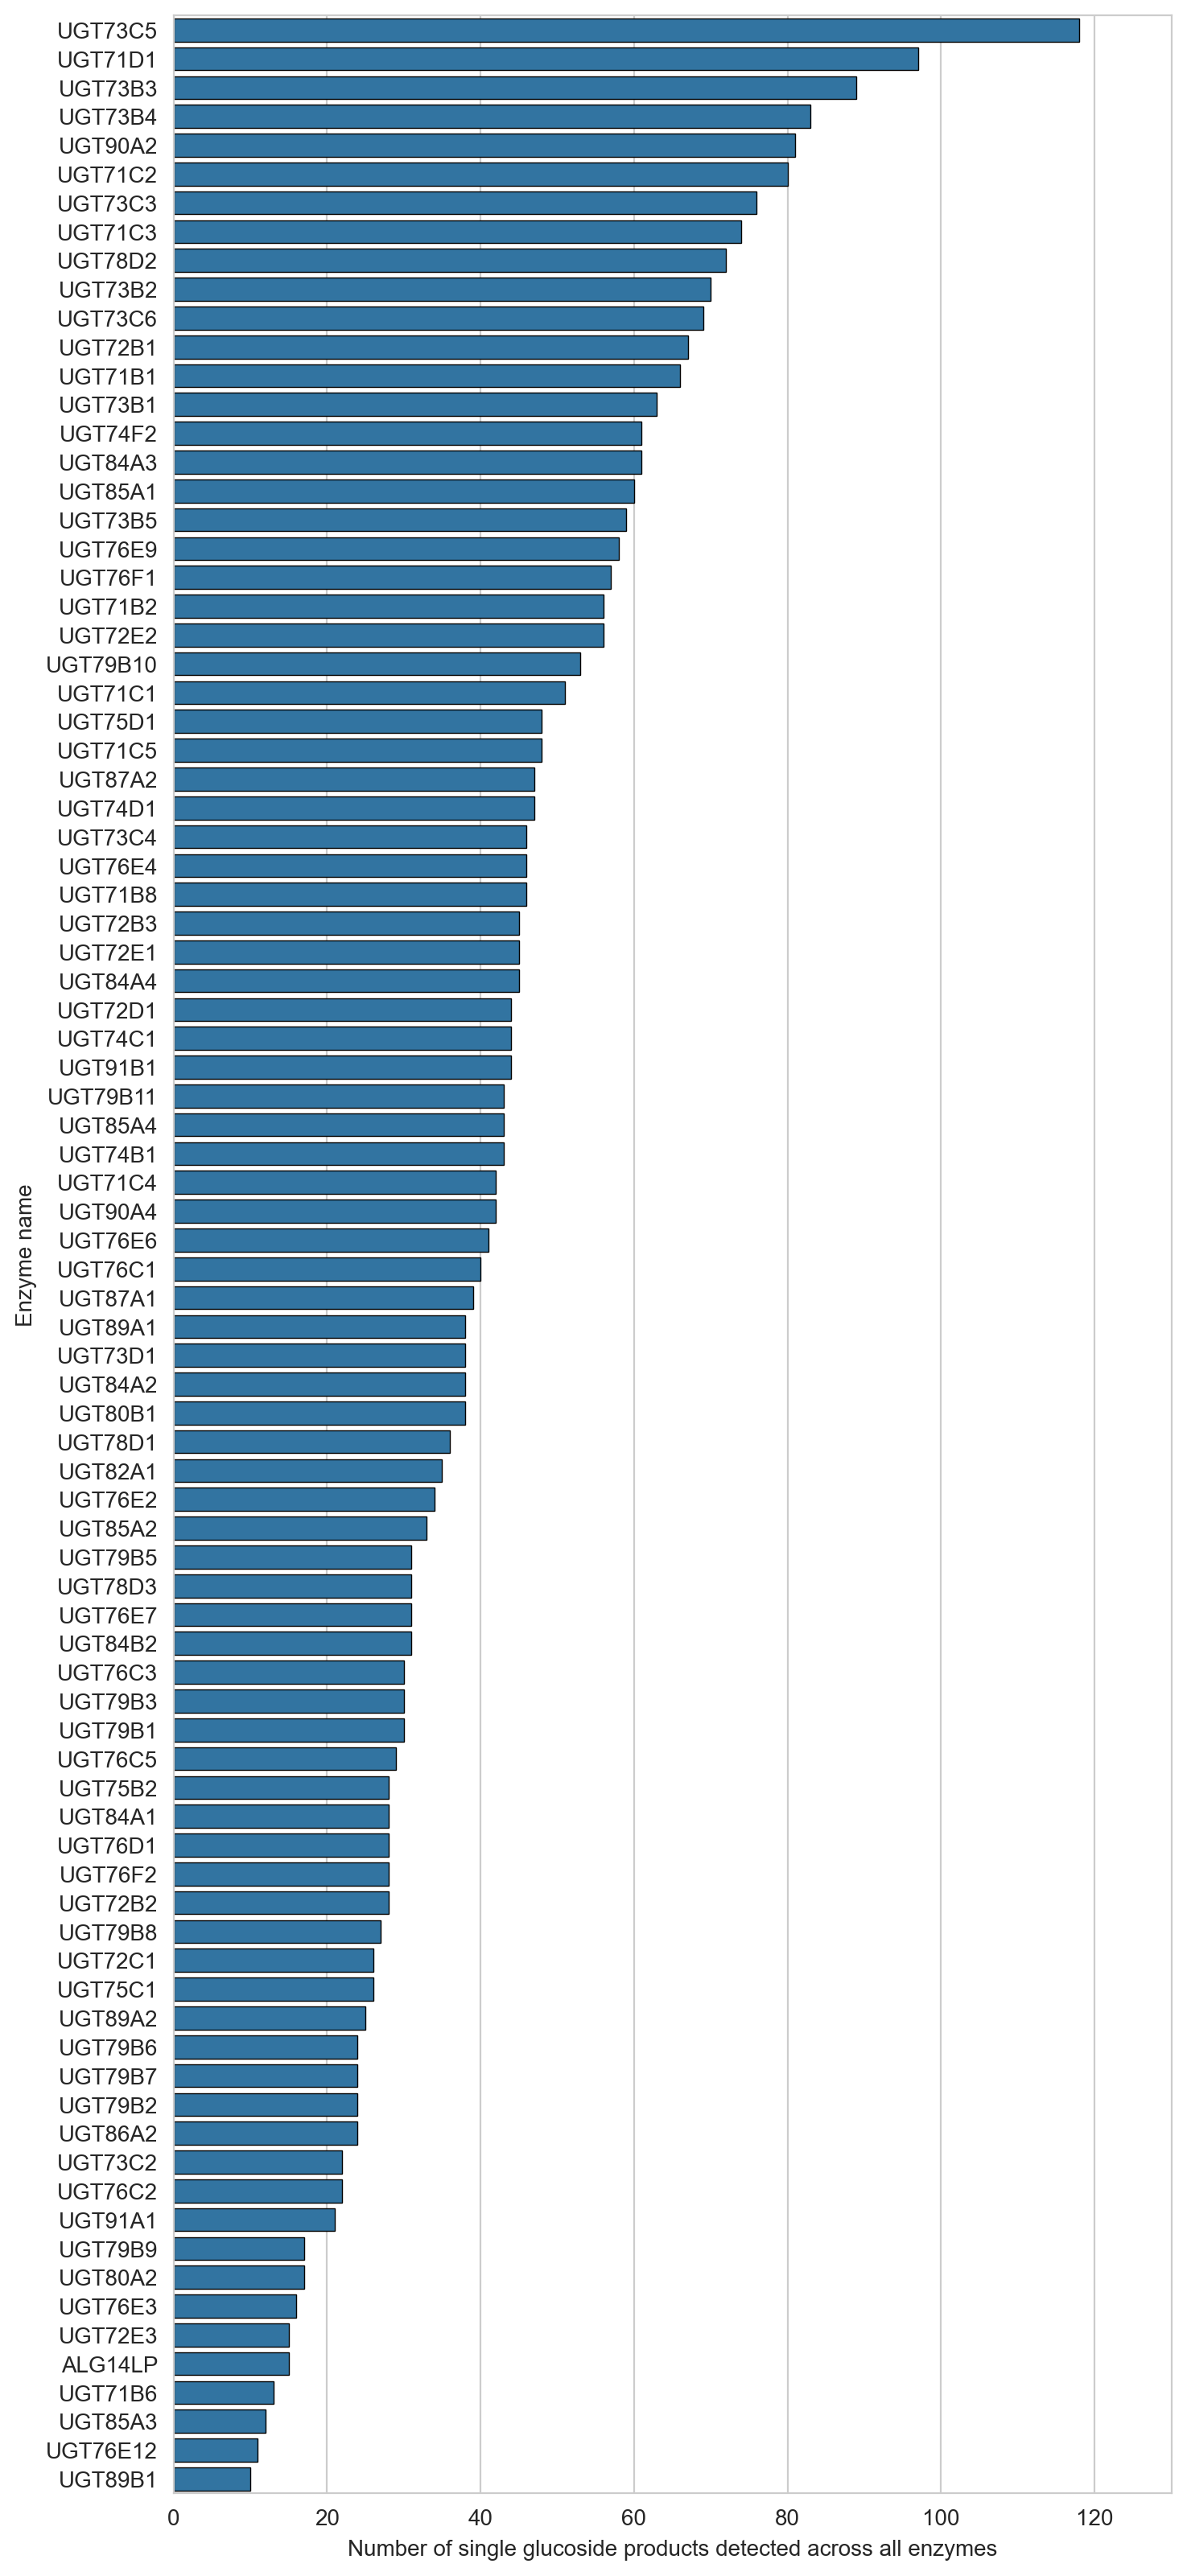

In [ ]:
### Not shown directly in paper - part of Figure 2f

order_save = df_singles['Enzyme_name'].value_counts().index

fig = plt.figure(figsize=(8, 20))

ax = sns.countplot(y="Enzyme_name", 
                   data=df_singles,
                   order = order_save,
                   edgecolor='k',
                   linewidth=0.5,)

plt.ylabel('Enzyme name')
plt.xlabel('Number of single glucoside products detected across all enzymes')
plt.xlim([0,130])
savefig('Enzyme_promiscuity_single_glucosides')

### Double glucosides identified

The we tally the number of diglucoside products generated by each enzyme:

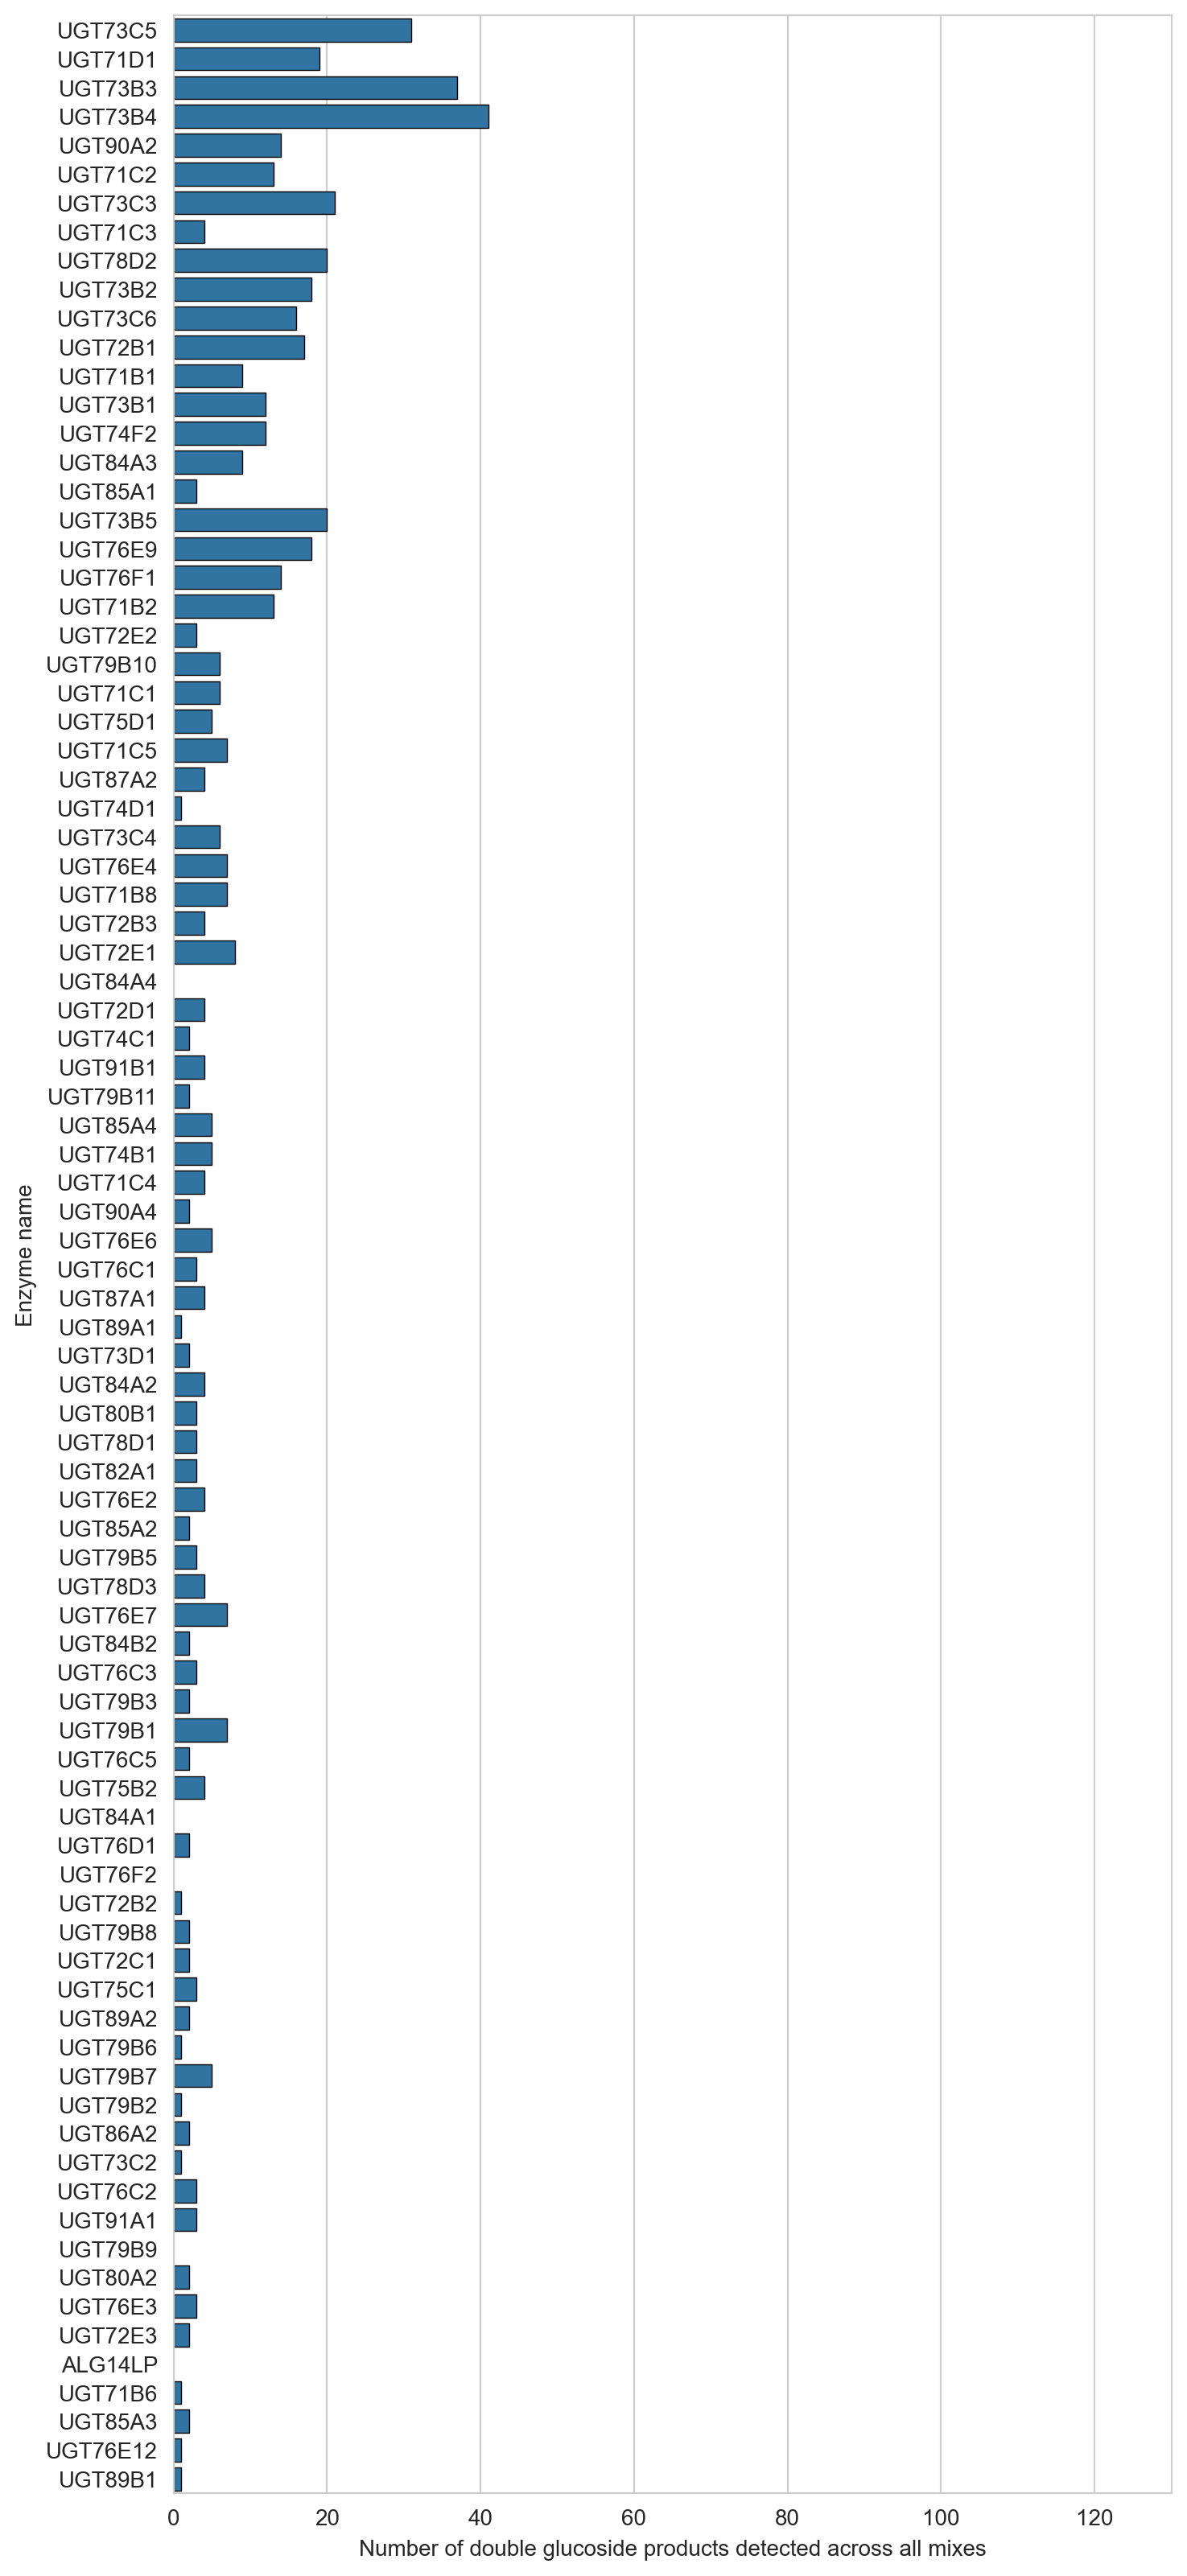

In [ ]:
## Not shown directly in paper - part of Figure 2f

fig = plt.figure(figsize=(8, 20))
fig.tight_layout()

ax = sns.countplot(y="Enzyme_name", 
                   data=df_doubles,
                   order = order_save,
                   edgecolor='k',
                   linewidth=0.5,)
plt.ylabel('Enzyme name')
plt.xlabel('Number of double glucoside products detected across all mixes')
plt.xlim([0,130])
savefig('Enzyme_promiscuity_double_glucosides')

### Number of substrates identified (leading to single or double glucoside)

We combine the unique substrates leading to mono- and diglucoside products to determine promiscuity of enzymes:

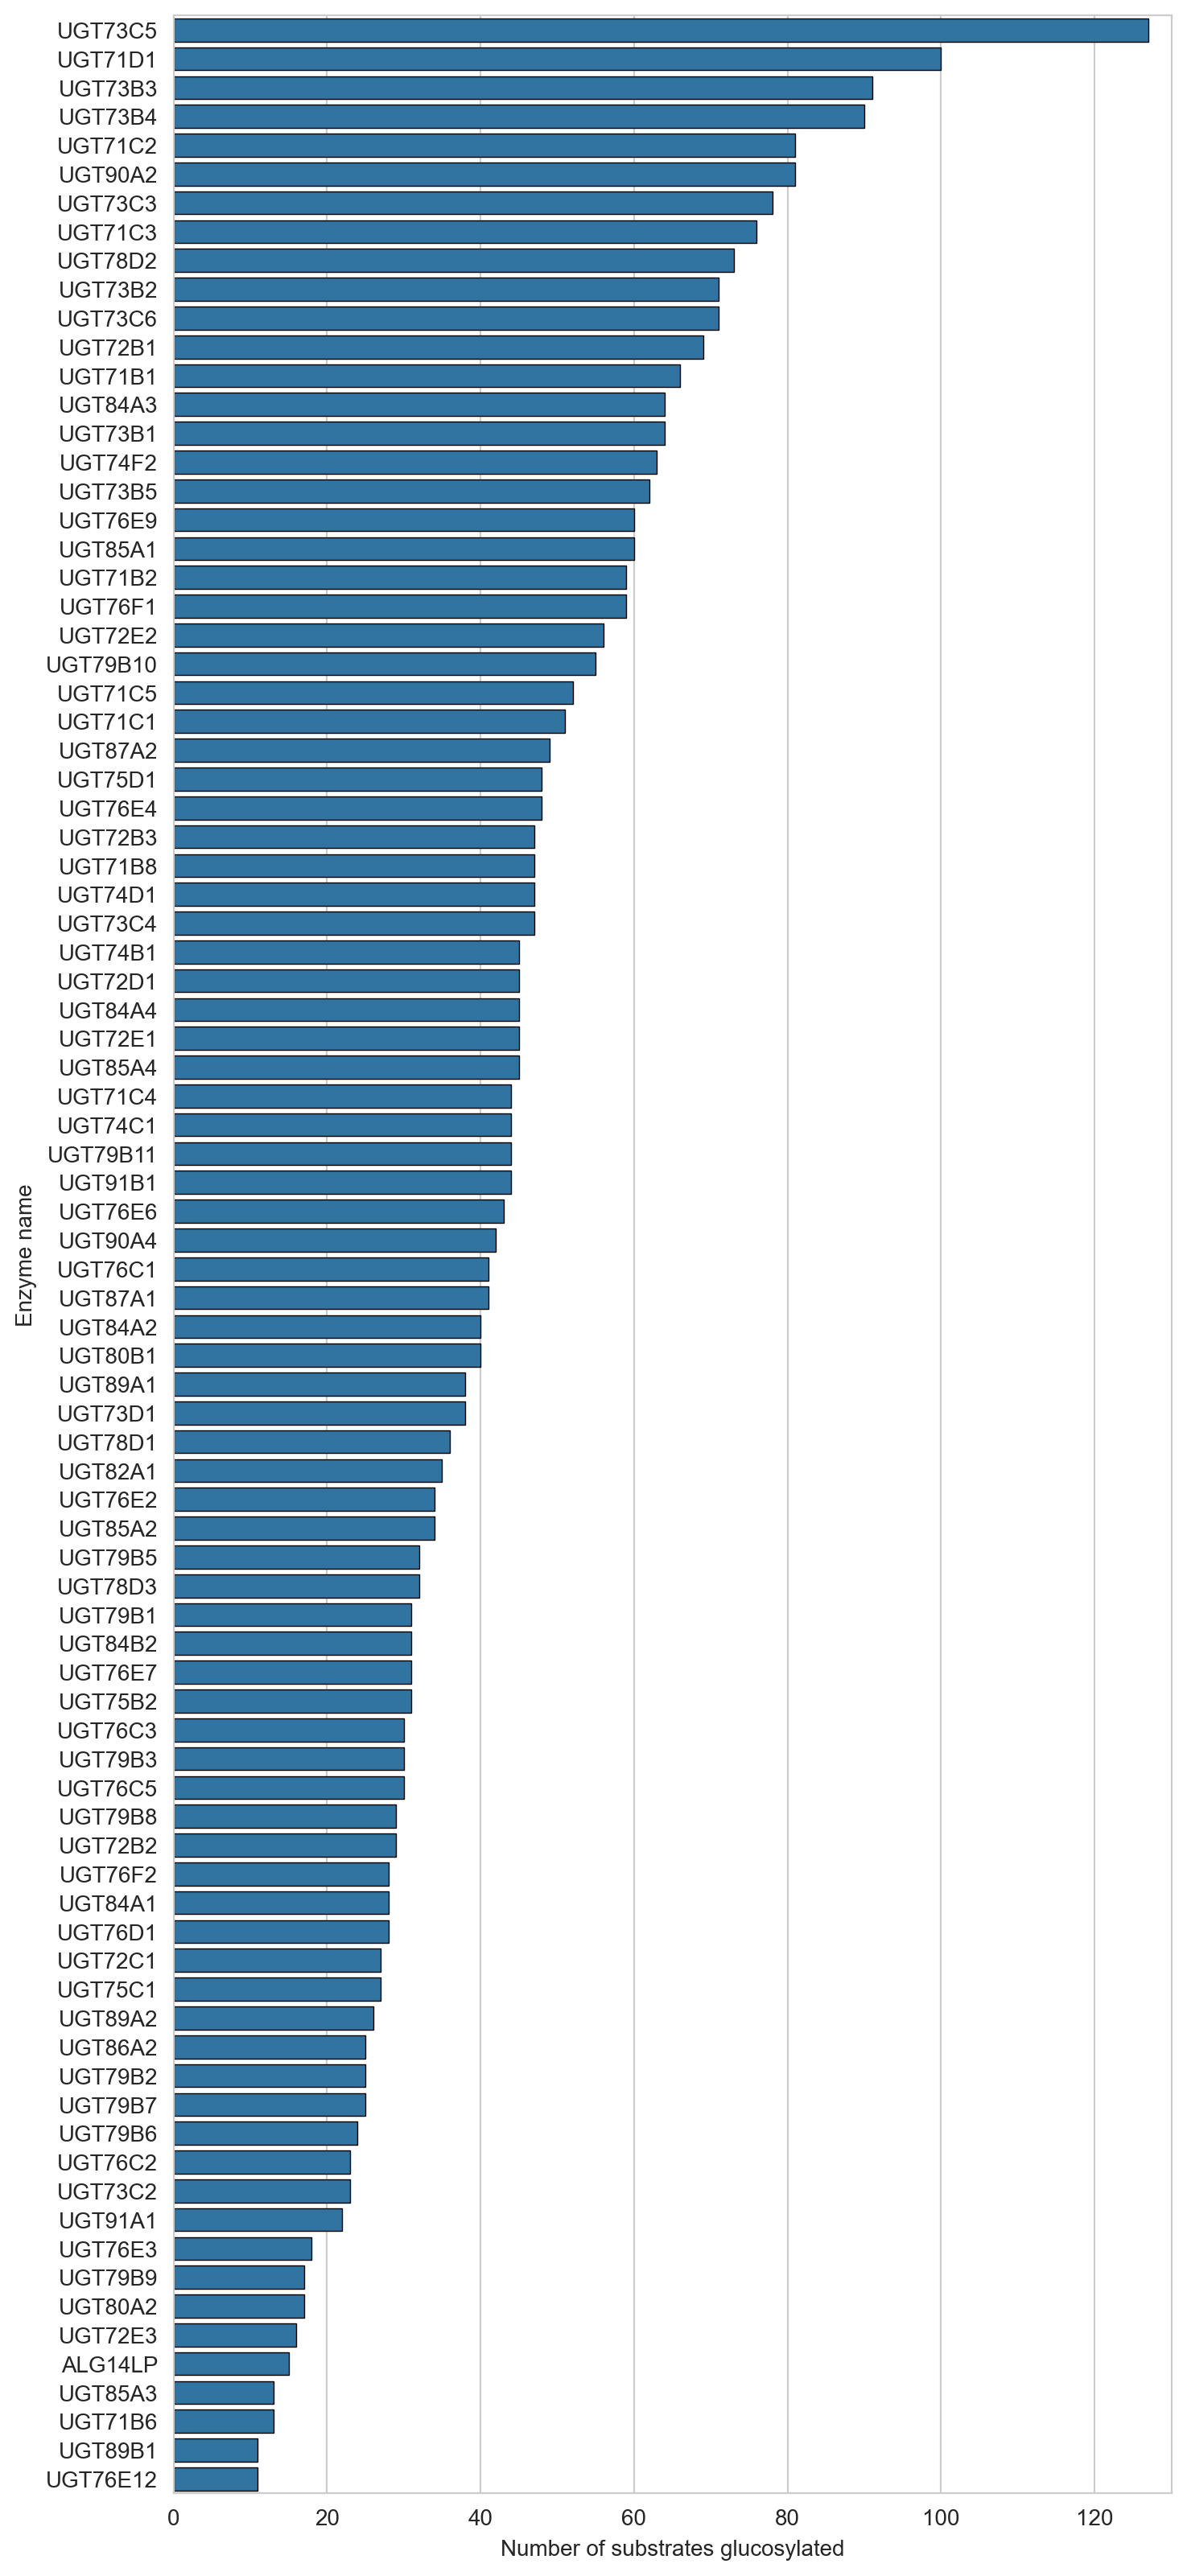

In [14]:
### Figure 2f

fig = plt.figure(figsize=(8, 20))
fig.tight_layout()
ax = sns.countplot(y="Enzyme_name", 
                   data=df_sd,
                   order = df_sd['Enzyme_name'].value_counts().index,
                   edgecolor='k',
                   linewidth=0.5,)
plt.ylabel('Enzyme name', fontsize=10)
plt.xlabel('Number of substrates glucosylated')
plt.xlim([0,130])
savefig('Enzyme_promiscuity')

In [15]:
df_sd['Enzyme_name'].value_counts().to_csv(filepath_results + 'enzyme_promiscuity_df_sd.csv', index=True)

### Pocket volume and promiscuity

We hypothesize that enzyme promiscuity may be driven by the volume of its active side volume. As such, we measure the volume of the acceptor substrate binding pocket of each enzyme plot using Caver. Then, we plot them against the number of accepted substrates observed in the lysate-based screen, which we use as a proxy for promiscuity.

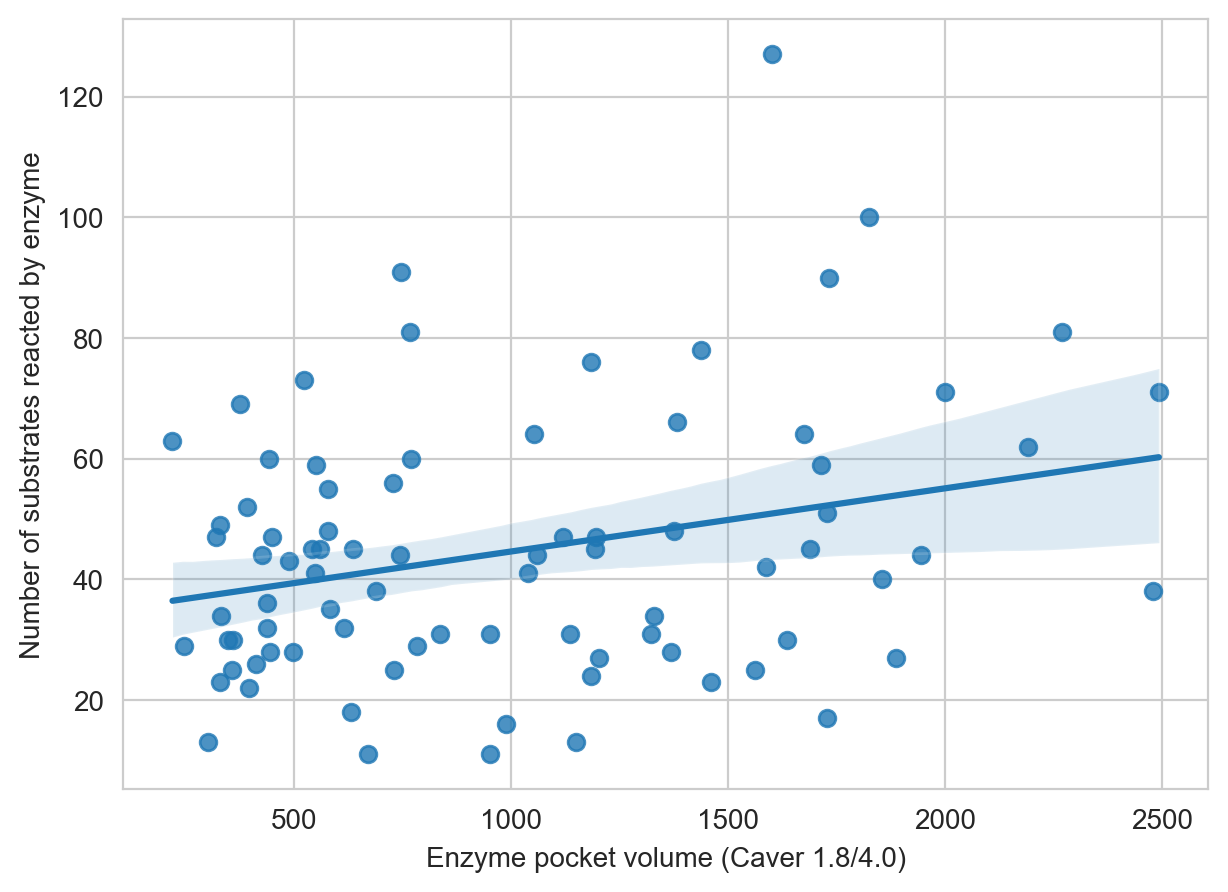

In [16]:
### Supplementary Figure 20a

df_enz = pd.read_csv('../data/enzyme_features.csv', na_values='na')

enz_sd = dict(df_sd['Enzyme_name'].value_counts())
df_enz['N_substrates_glycosylated'] = df_enz['Enzyme_name'].apply(lambda x: enz_sd.get(x, np.nan))

plt.figure(figsize=(7,5))
sns.regplot(data=df_enz, x='Caver 1.8/4.0', y='N_substrates_glycosylated')
plt.ylabel('Number of substrates reacted by enzyme')
plt.xlabel('Enzyme pocket volume (Caver 1.8/4.0)')
savefig('pocket_promiscuity')

### The number of enzymes that turn over each substrate

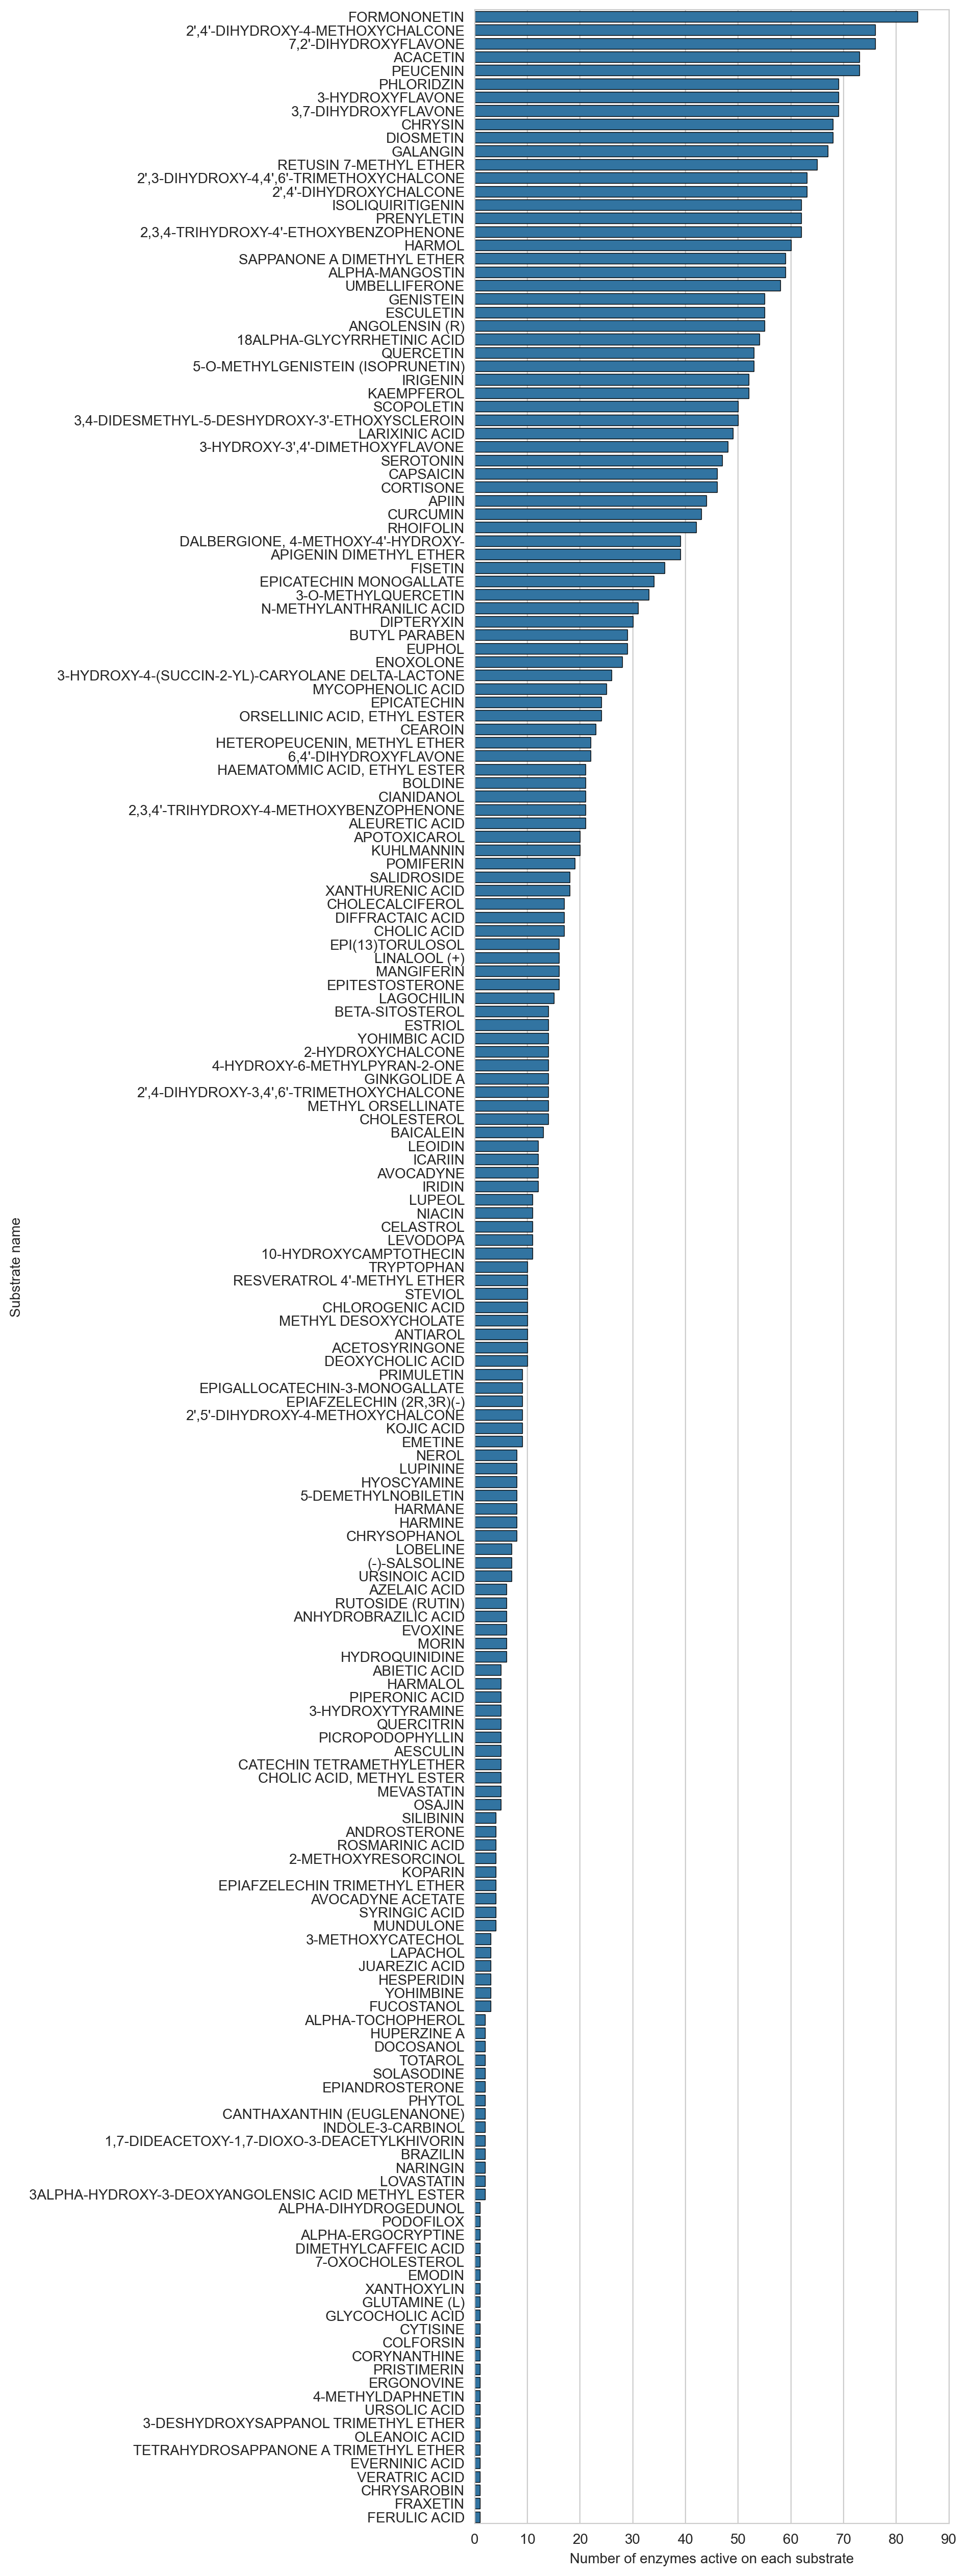

In [ ]:
### Figure 2a

fig = plt.figure(figsize=(6, 32))
ax = sns.countplot(y="Name", 
                   data=df_sd,
                   order = df_sd['Name'].value_counts().index,
                   edgecolor='k',
                   linewidth=0.5,)
plt.ylabel('Substrate name')
plt.xlabel('Number of enzymes active on each substrate')
ax.set_xticks(range(0,91,10))
plt.xlim([0,90])
savefig('Substrate_promiscuity')

In [18]:
### Number of enzymes that turn over the "median" substrates

df_sd.groupby('Enzyme_name').size().median()

41.5

In [19]:
### Number of unique substrates that are turned over by at least one enzyme

df_sd['Name'].nunique()

187

In [20]:
### Top 10 most accepted substrates

df_sd['Name'].value_counts().head(10)

Name
FORMONONETIN                         84
2',4'-DIHYDROXY-4-METHOXYCHALCONE    76
7,2'-DIHYDROXYFLAVONE                76
ACACETIN                             73
PEUCENIN                             73
PHLORIDZIN                           69
3-HYDROXYFLAVONE                     69
3,7-DIHYDROXYFLAVONE                 69
CHRYSIN                              68
DIOSMETIN                            68
Name: count, dtype: int64

In [21]:
### Top 5 most active enzymes

df_sd.groupby('Enzyme_name').size().sort_values(ascending=False).head()

Enzyme_name
UGT73C5    127
UGT71D1    100
UGT73B3     91
UGT73B4     90
UGT71C2     81
dtype: int64

In [ ]:
### Top 5 least active enzymes

df_sd.groupby('Enzyme_name').size().sort_values(ascending=True).head()

Enzyme_name
UGT76E12    11
UGT89B1     11
UGT85A3     13
UGT71B6     13
ALG14LP     15
dtype: int64

### Some properties of substrates vs. non-substrates

In [23]:
dict_substrate_reactions = dict(df_sd['Name'].value_counts())
df_substrates['num_acceptor_enzymes'] = df_substrates['Name'].apply(lambda x: dict_substrate_reactions.get(x, 0))

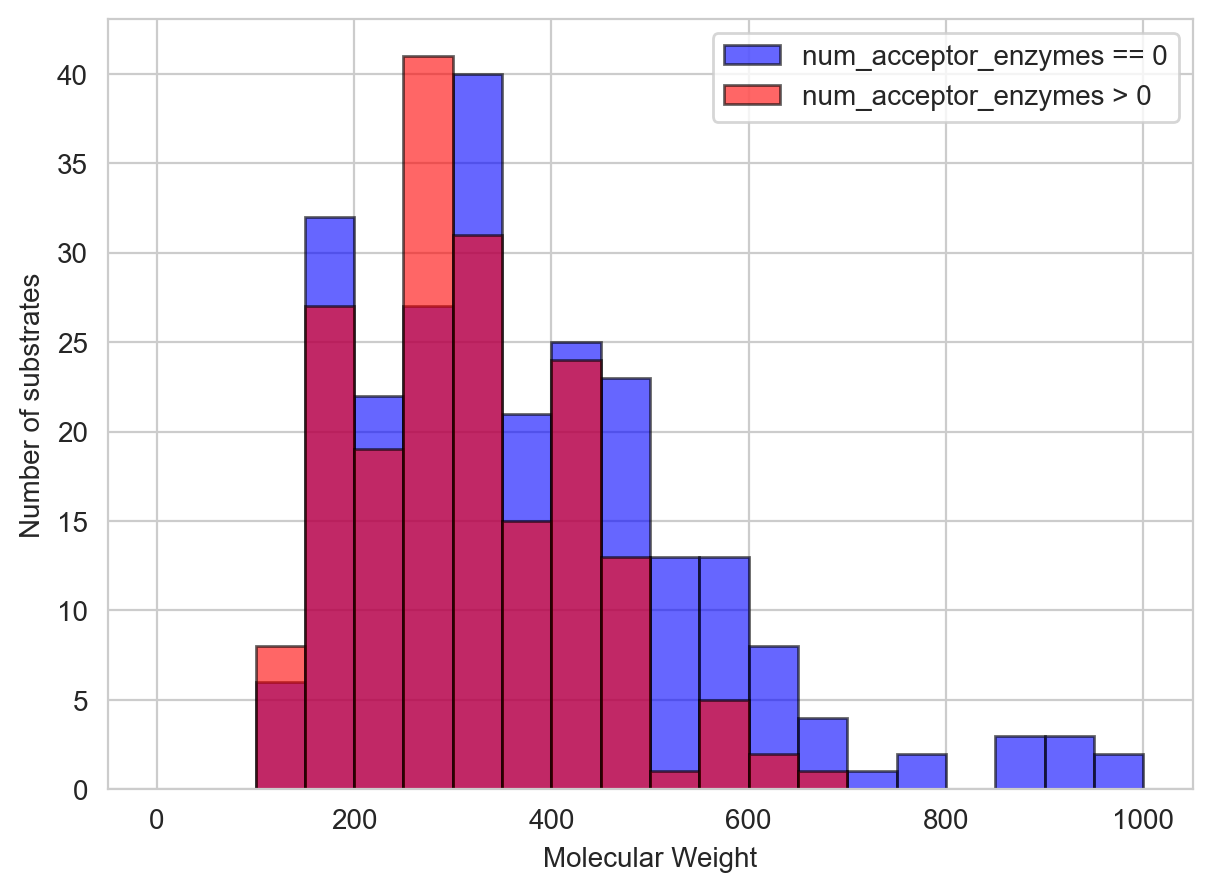

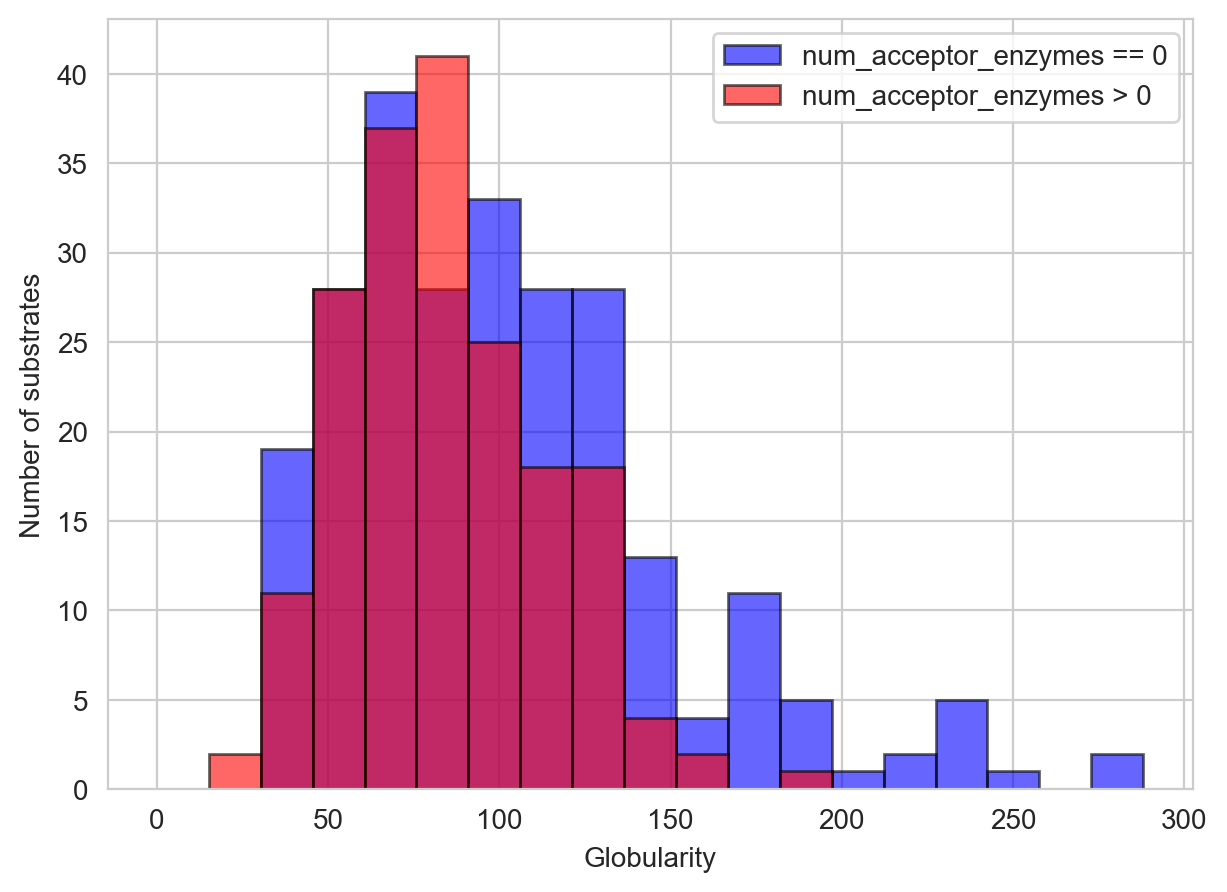

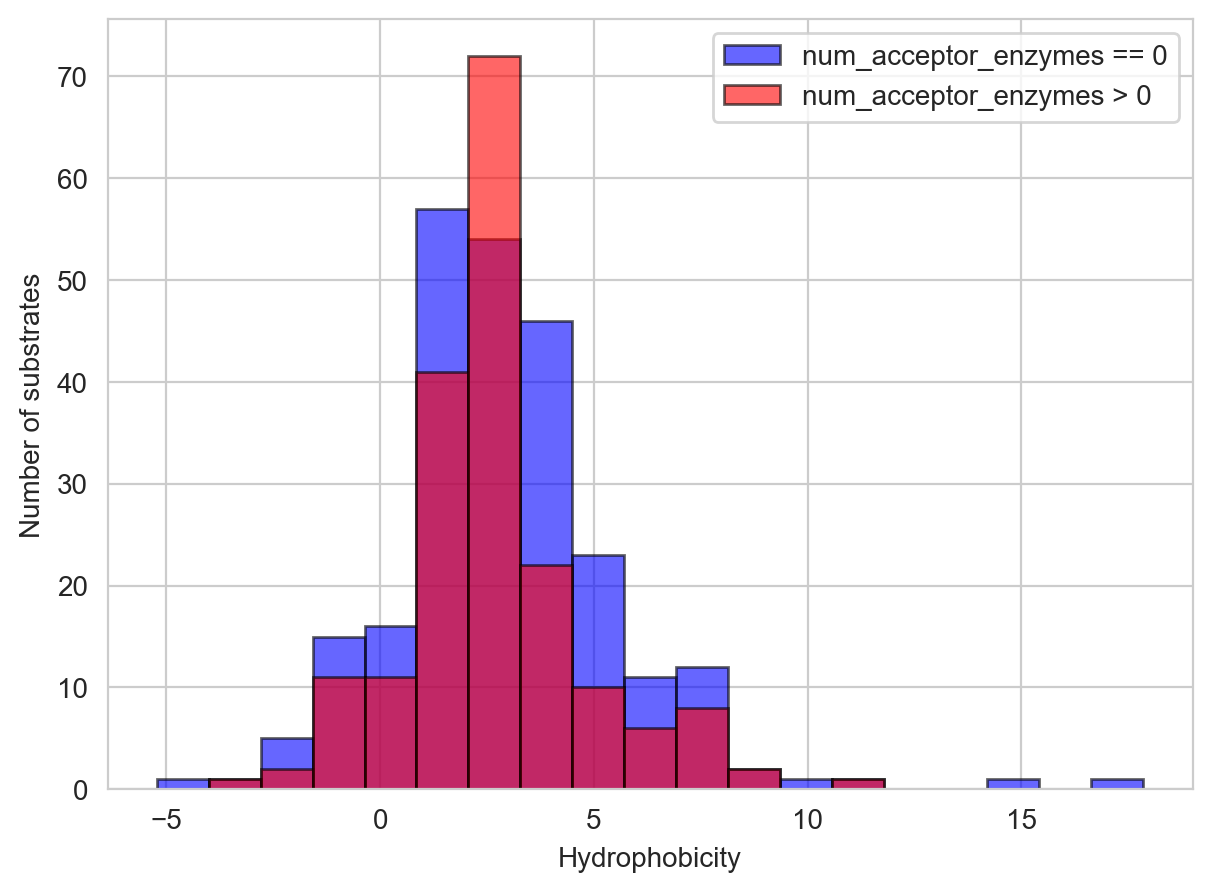

In [24]:
### Supplementary Figure 12

from rdkit import Chem
from rdkit.Chem import Descriptors

df_tmp = df_substrates.copy()

# Generate RDKit molecule objects
df_tmp['Molecule'] = df_tmp['SMILES'].apply(Chem.MolFromSmiles)

# Calculate molecular weight, globularity, and hydrophobicity (LogP)
df_tmp['Molecular_Weight'] = df_tmp['Molecule'].apply(Descriptors.MolWt)
df_tmp['Globularity'] = df_tmp['Molecule'].apply(Descriptors.MolMR)  # Approximate descriptor for globularity
df_tmp['Hydrophobicity'] = df_tmp['Molecule'].apply(Descriptors.MolLogP)  # Using LogP as a measure of hydrophobicity

# Define the bins for molecular weight from 0 to 1000, with a width of 50 units
bins_mw = range(0, 1050, 50)

# Define the bins for globularity (using a reasonable range based on typical values)
bins_glob = np.linspace(0, max(df_tmp['Globularity']), 20)

# Define the bins for hydrophobicity (using a reasonable range based on typical values)
bins_hydro = np.linspace(min(df_tmp['Hydrophobicity']), max(df_tmp['Hydrophobicity']), 20)

# Plotting the histograms
descriptors = {
    'Molecular Weight': {'data': df_tmp['Molecular_Weight'], 'bins': bins_mw},
    'Globularity': {'data': df_tmp['Globularity'], 'bins': bins_glob},
    'Hydrophobicity': {'data': df_tmp['Hydrophobicity'], 'bins': bins_hydro}
}

for descriptor_name, descriptor_info in descriptors.items():
    group_0 = df_tmp[df_tmp['num_acceptor_enzymes'] == 0][descriptor_info['data'].name]
    group_1 = df_tmp[df_tmp['num_acceptor_enzymes'] > 0][descriptor_info['data'].name]

    plt.figure(figsize=(7, 5))
    plt.hist(group_0, bins=descriptor_info['bins'], alpha=0.6, label='num_acceptor_enzymes == 0', color='blue', edgecolor='black')
    plt.hist(group_1, bins=descriptor_info['bins'], alpha=0.6, label='num_acceptor_enzymes > 0', color='red', edgecolor='black')

    # Add labels and title
    plt.xlabel(descriptor_name)
    plt.ylabel('Number of substrates')
    plt.legend(loc='upper right')
    plt.grid('xy')
    savefig(f'substrates_by_{descriptor_name}')


## Part 3 - Classification of substrates into superclasses according to NP Classifier

### Assigning substrate superclasses

In [25]:
df_substrates['superclass'] = df_substrates['superclass'].fillna("NA")

# if a compound belongs to more than two superclasses, we assign it to the most abundant superclass
num_substrates_per_class = dict(df_substrates['superclass'].value_counts())

all_superclasses = []
superclass_list = []
for c in df_substrates['superclass'].values:
    if ";" in c:
        tmp = c.split(";")
        sc = tmp[0]
        v = num_substrates_per_class.get(tmp[0], 1)
        for t in tmp[1:]:
            if num_substrates_per_class.get(t, 1) > v:
                v = num_substrates_per_class.get(t, 1)
                sc = t
    else:
        sc = c
    superclass_list.append(sc)
            
### Total number of superclasses represented in the substrate candidate library
df_substrates['superclass'] = superclass_list    
num_substrates_per_class = dict(df_substrates['superclass'].value_counts())
print(df_substrates['superclass'].nunique())

42


In [26]:
D = dict(zip(df_substrates['CSMILES'], df_substrates['superclass']))
df_sd['superclass'] = [D[x] for x in df_sd['CSMILES']]

In [28]:
num_reacted = dict(df_sd['superclass'].value_counts())
num_enzymes = len(enzymes_inclusion)
fraction_reacted = [num_reacted.get(x,0) / num_substrates_per_class[x] / num_enzymes * 100 for x in num_substrates_per_class.keys()]

In [29]:
df_tmp = pd.DataFrame({"superclass": num_substrates_per_class.keys(),
                      "fraction_reacted": fraction_reacted})

labels = [f'{s} ({num_substrates_per_class[s]})' for s in num_substrates_per_class.keys()]
df_tmp['labels'] = labels
df_tmp.sort_values('fraction_reacted', ascending=False, inplace=True)

In [ ]:
# Total number of superclasses
print(df_tmp.shape)

# Number of superclasses with at least 1 substrate turned over
print(df_tmp[df_tmp['fraction_reacted']>0].shape)

(42, 3)
(34, 3)


In [31]:
name2superclass = dict(zip(df_substrates['Name'], df_substrates['superclass']))

In [32]:
# Number of superclasses represented by substrates turned over by UGT73C5.
df_sd['superclass'] = df_sd['Name'].apply(lambda x: name2superclass[x])
df_sd.query('Enzyme_name=="UGT73C5"')['superclass'].nunique()

29

### Lumping superclasses with <5 members under "Other"

In [ ]:
# Let us now lump less abundant superclasses under "Other"
superclass_short_list = []
for c in df_substrates['superclass'].values:
    if num_substrates_per_class.get(c, 1) < 5: # Let us lump less abundant superclasses into other
        sc = "Other"
    else:
        sc = c
    superclass_short_list.append(sc)
            
df_substrates['superclass_short'] = superclass_short_list  

In [35]:
D = dict(zip(df_substrates['CSMILES'], df_substrates['superclass']))
df_sd['superclass'] = [D[x] for x in df_sd['CSMILES']]
df_singles['superclass'] = [D[x] for x in df_singles['CSMILES']]
df_doubles['superclass'] = [D[x] for x in df_doubles['CSMILES']]

D = dict(zip(df_substrates['CSMILES'], df_substrates['superclass_short']))
df_sd['superclass_short'] = [D[x] for x in df_sd['CSMILES']]
df_singles['superclass_short'] = [D[x] for x in df_singles['CSMILES']]
df_doubles['superclass_short'] = [D[x] for x in df_doubles['CSMILES']]

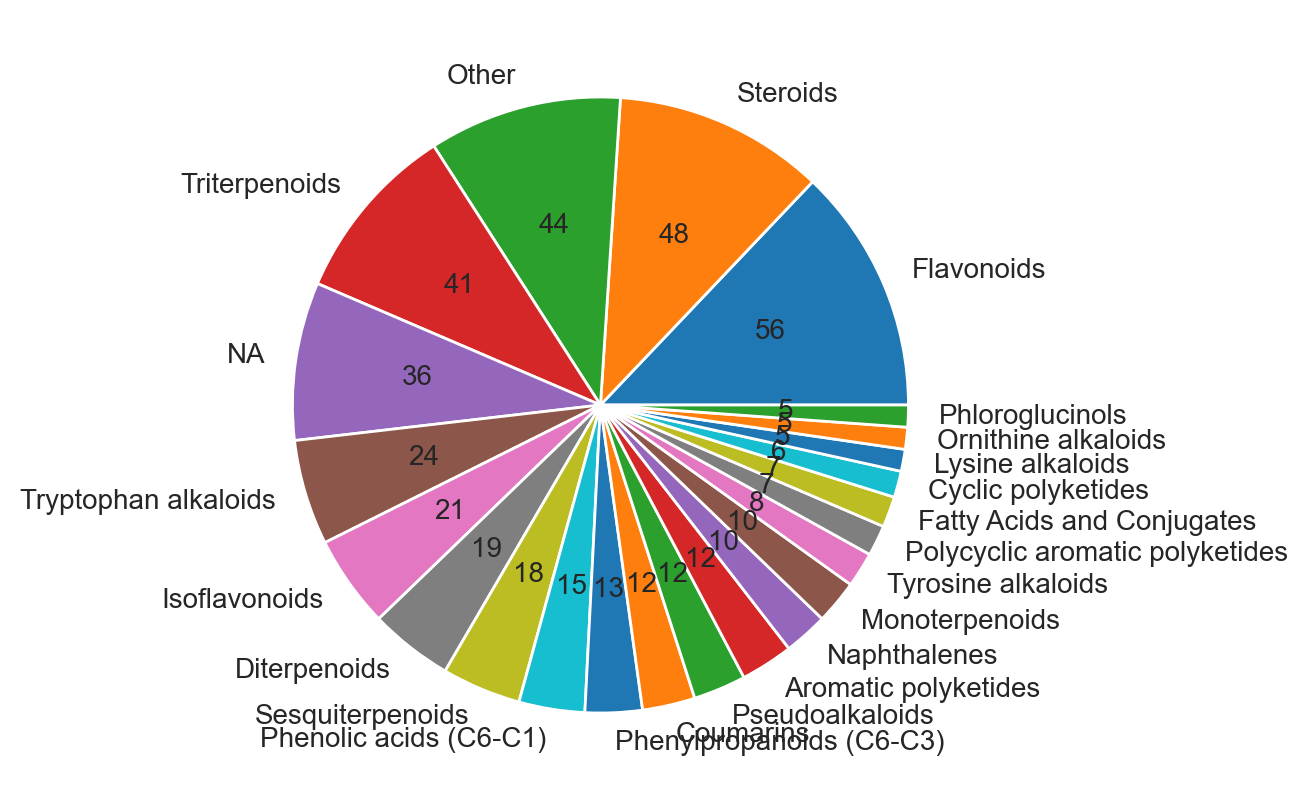

In [36]:
### Figure 1c

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return val
    return my_autopct

df_substrates['superclass_short'].value_counts().plot(kind='pie', autopct=make_autopct(df_substrates['superclass_short'].value_counts()))
plt.ylabel(None)
savefig('pie_substrate_superclasses')

In [37]:
num_reacted = dict(df_sd['superclass_short'].value_counts())
num_enzymes = len(enzymes_inclusion)
num_substrates_per_class = dict(df_substrates['superclass_short'].value_counts())
fraction_reacted = [num_reacted.get(x,0) / num_substrates_per_class[x] / num_enzymes * 100 for x in num_substrates_per_class.keys()]

df_tmp = pd.DataFrame({"superclass": num_substrates_per_class.keys(),
                      "fraction_reacted": fraction_reacted})

labels = [f'{s} ({num_substrates_per_class[s]})' for s in num_substrates_per_class.keys()]
df_tmp['labels'] = labels
df_tmp.sort_values('fraction_reacted', ascending=False, inplace=True)

### Preferences of enzymes for superclasses of compounds

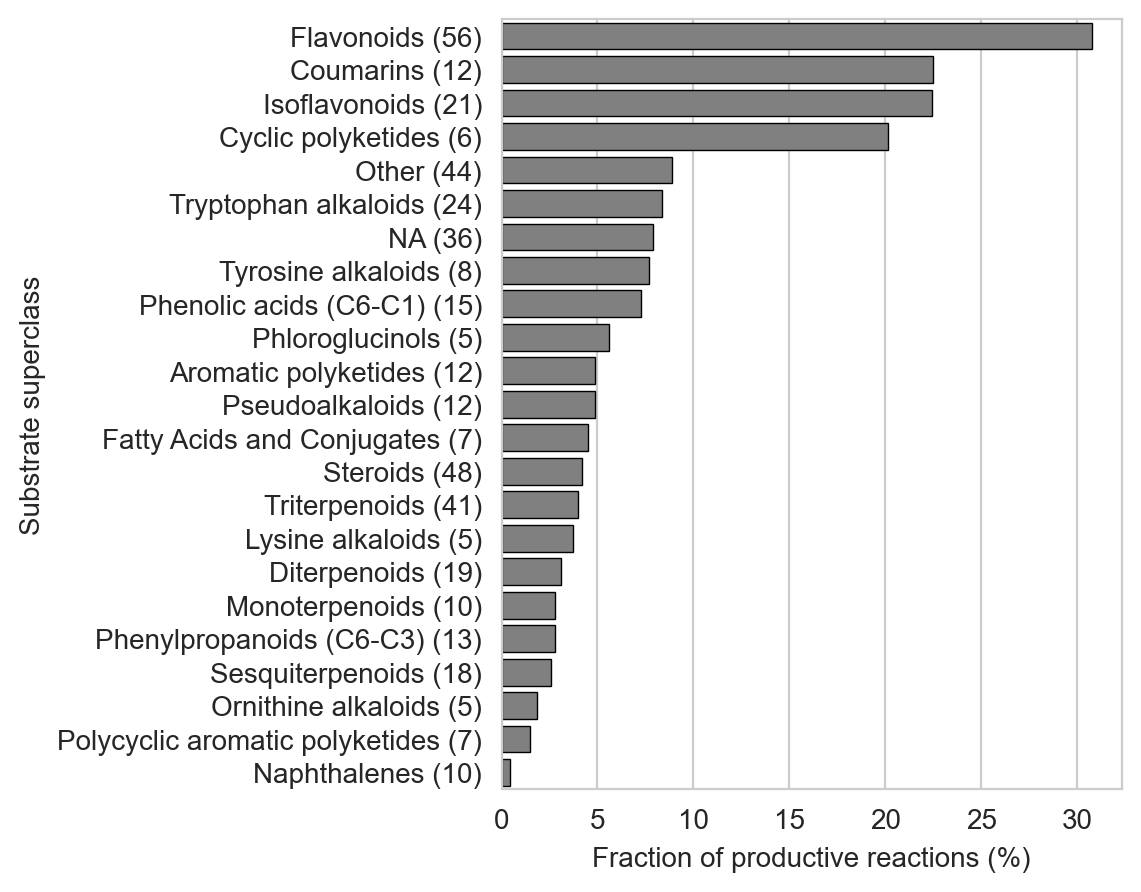

In [38]:
### Figure 2e

plt.figure(figsize=(4,5))
sns.barplot(y='labels', x="fraction_reacted", data=df_tmp,
           color='gray', edgecolor='k', linewidth=0.5)
plt.ylabel('Substrate superclass')
plt.xlabel('Fraction of productive reactions (%)')
savefig('bars_substrate_superclasses')

In [39]:
df_tmp.head()

superclass  fraction_reacted                  labels
0           Flavonoids         30.772425         Flavonoids (56)
11           Coumarins         22.480620          Coumarins (12)
6        Isoflavonoids         22.425249      Isoflavonoids (21)
19  Cyclic polyketides         20.155039  Cyclic polyketides (6)
2                Other          8.905920              Other (44)

## Part 4 - Biases in the reference library created from MoNA

Here we check whether the observed trends in the lysate-based screening results are affected by biases in the reference library created from MoNA. Specifically, we check the effects of the number of spectra for each substrate and the number of peaks in each spectra.

In [40]:
import pickle

with open('../old/results_v3/MS2_database_shifts_162_320_VB_clean.pkl', 'rb') as f:
    df_lib = pickle.load(f)

In [41]:
name2monaentries = dict(df_lib['Name'].value_counts())

# let us get the min no. of peaks in MoNA for each substrate
df_lib['no_peaks'] = df_lib['mz'].apply(lambda x: len(x))
min_no_peaks = df_lib.groupby('Name')['no_peaks'].min().to_dict()

df_substrates['no_mona_entries'] = df_substrates['Name'].apply(lambda x: name2monaentries[x])
df_substrates['min_mona_peaks'] = df_substrates['Name'].apply(lambda x: min_no_peaks[x])

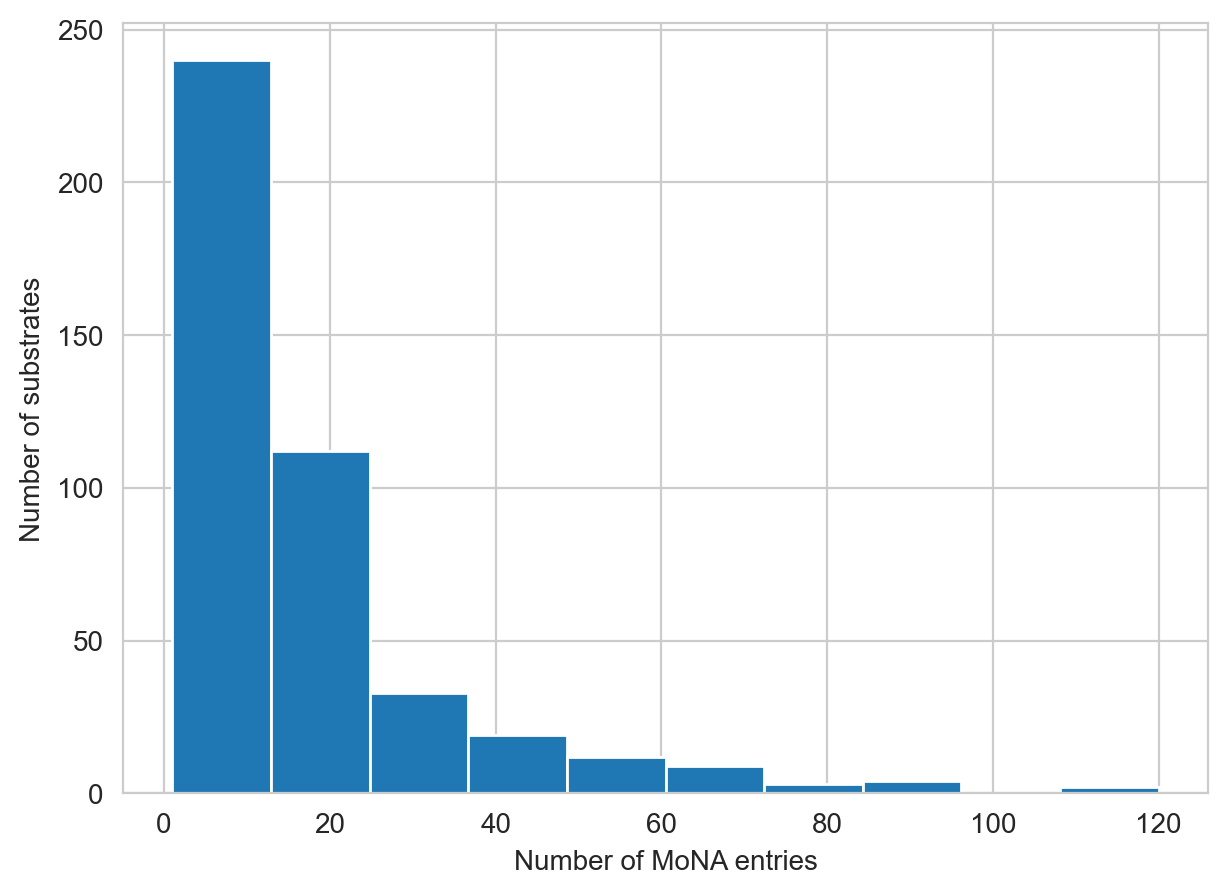

In [42]:
# For all substrates

### Supplementary Figure 7b top

df_substrates['no_mona_entries'].hist()
plt.xlabel('Number of MoNA entries')
plt.ylabel('Number of substrates')
savefig('MoNA_counts_1')

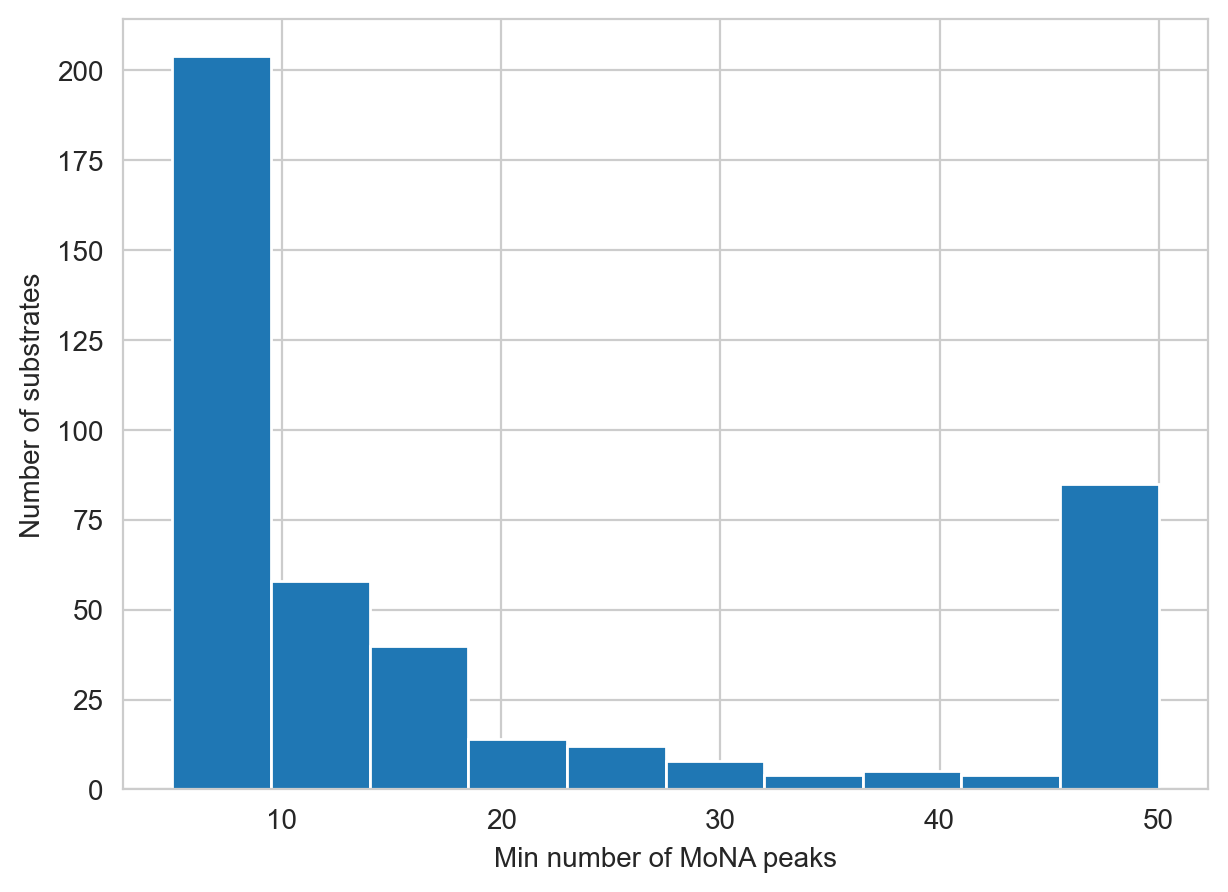

In [43]:
### Supplementary Figure 8b top

df_substrates['min_mona_peaks'].hist()
plt.xlabel('Min number of MoNA peaks')
plt.ylabel('Number of substrates')
savefig('MoNA_counts_1b')

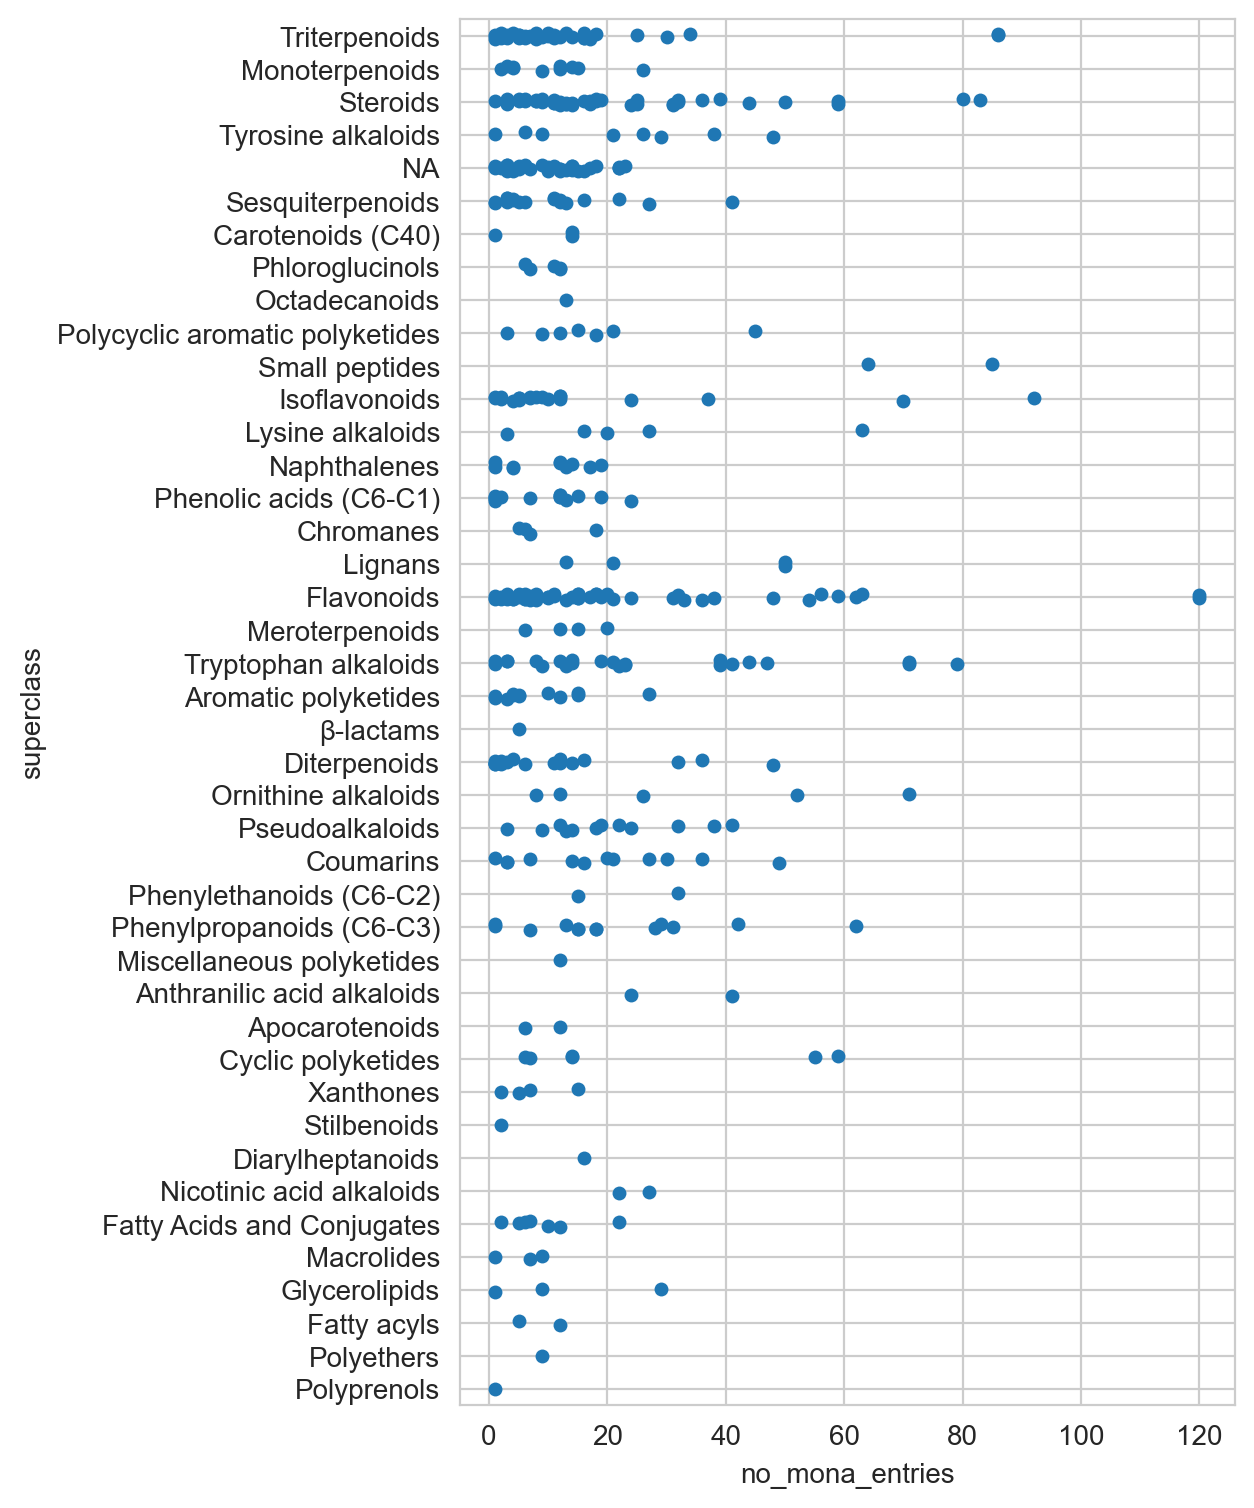

In [44]:
### Supplementary Figure 7c

plt.figure(figsize=(5,9))
sns.stripplot(y='superclass', x='no_mona_entries', data=df_substrates)
plt.grid('xy')
savefig('MoNA_counts_2')

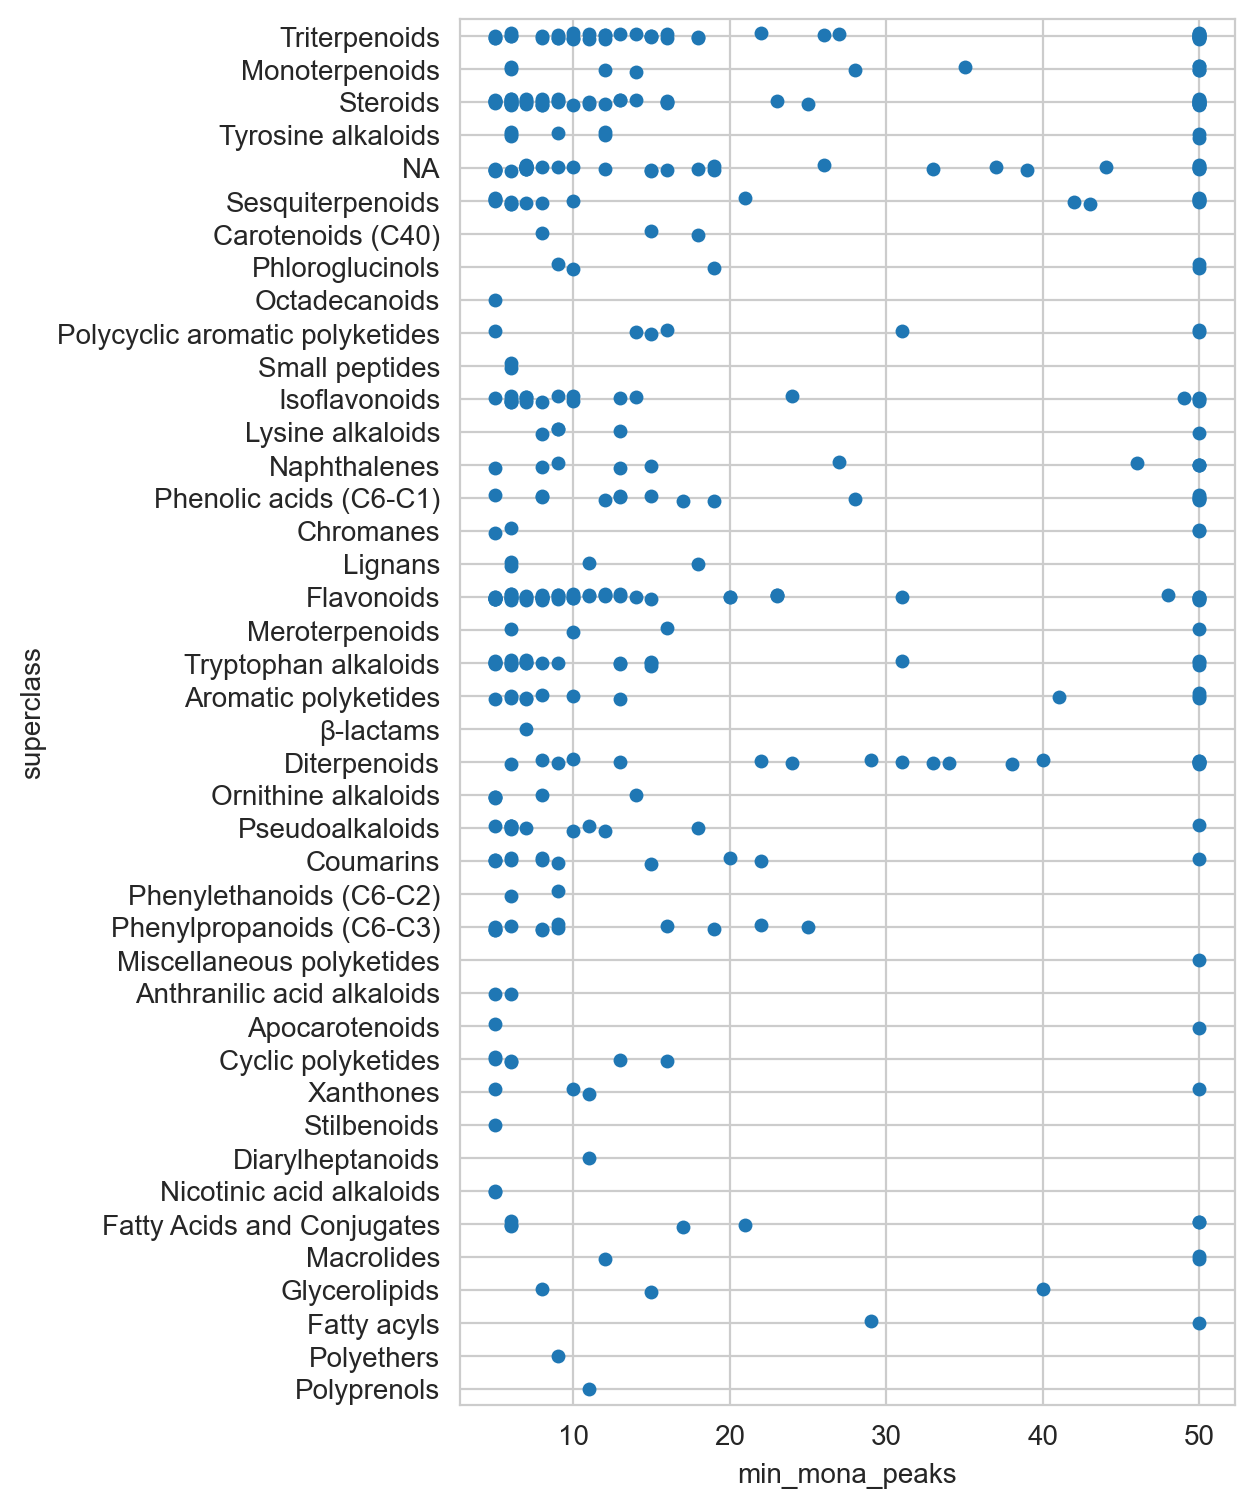

In [45]:
### Supplementary Figure 8c

plt.figure(figsize=(5,9))
sns.stripplot(y='superclass', x='min_mona_peaks', data=df_substrates)
plt.grid('xy')
savefig('MoNA_counts_2b')

In [46]:
substrates_reacted = df.query('AUC>0')['Name'].unique()

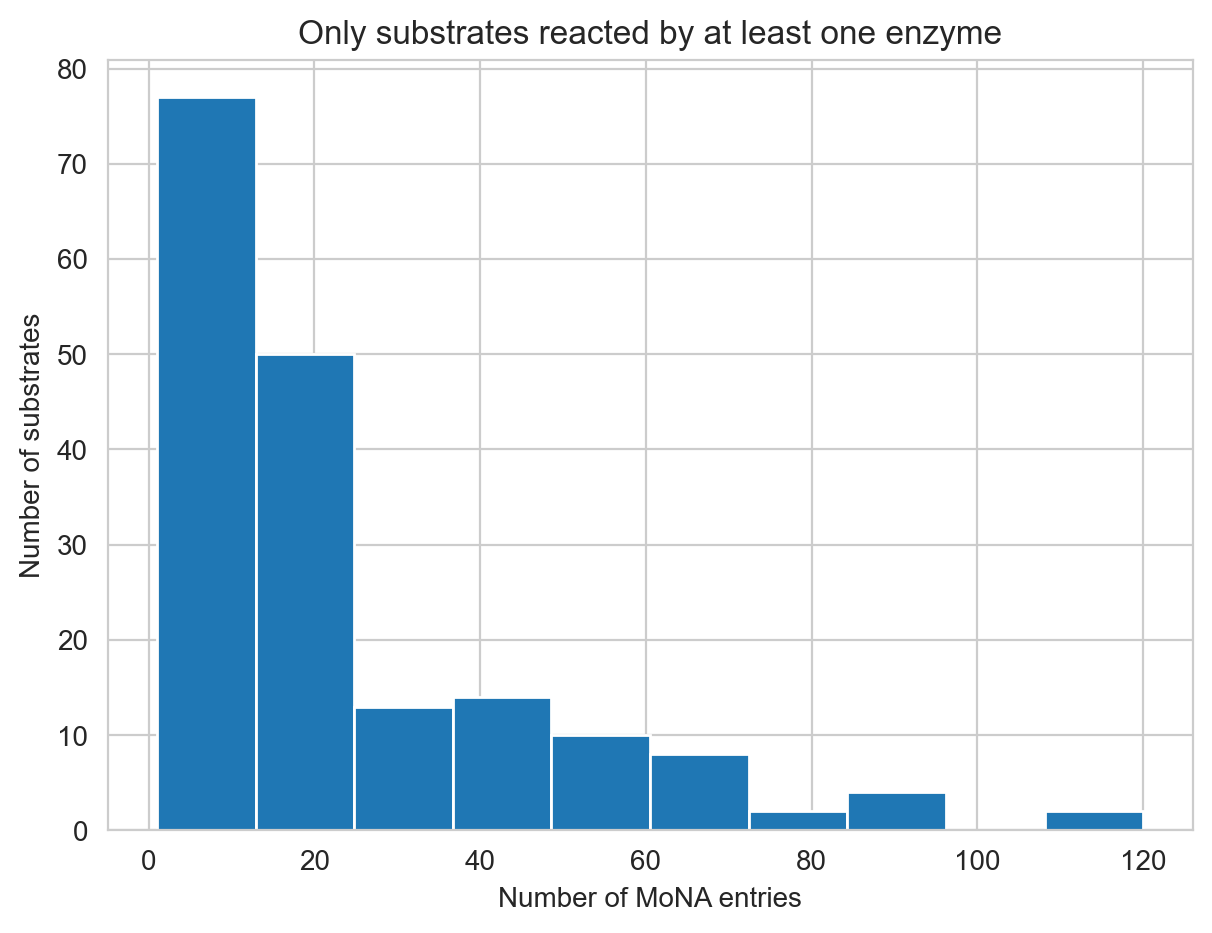

In [47]:
# Only for substrates turned over by at least one enzyme

### Supplementary Figure 7b bottom

df_substrates[df_substrates['Name'].isin(substrates_reacted)]['no_mona_entries'].hist()
plt.xlabel('Number of MoNA entries')
plt.ylabel('Number of substrates')
plt.title('Only substrates reacted by at least one enzyme')
savefig('MoNA_counts_3')

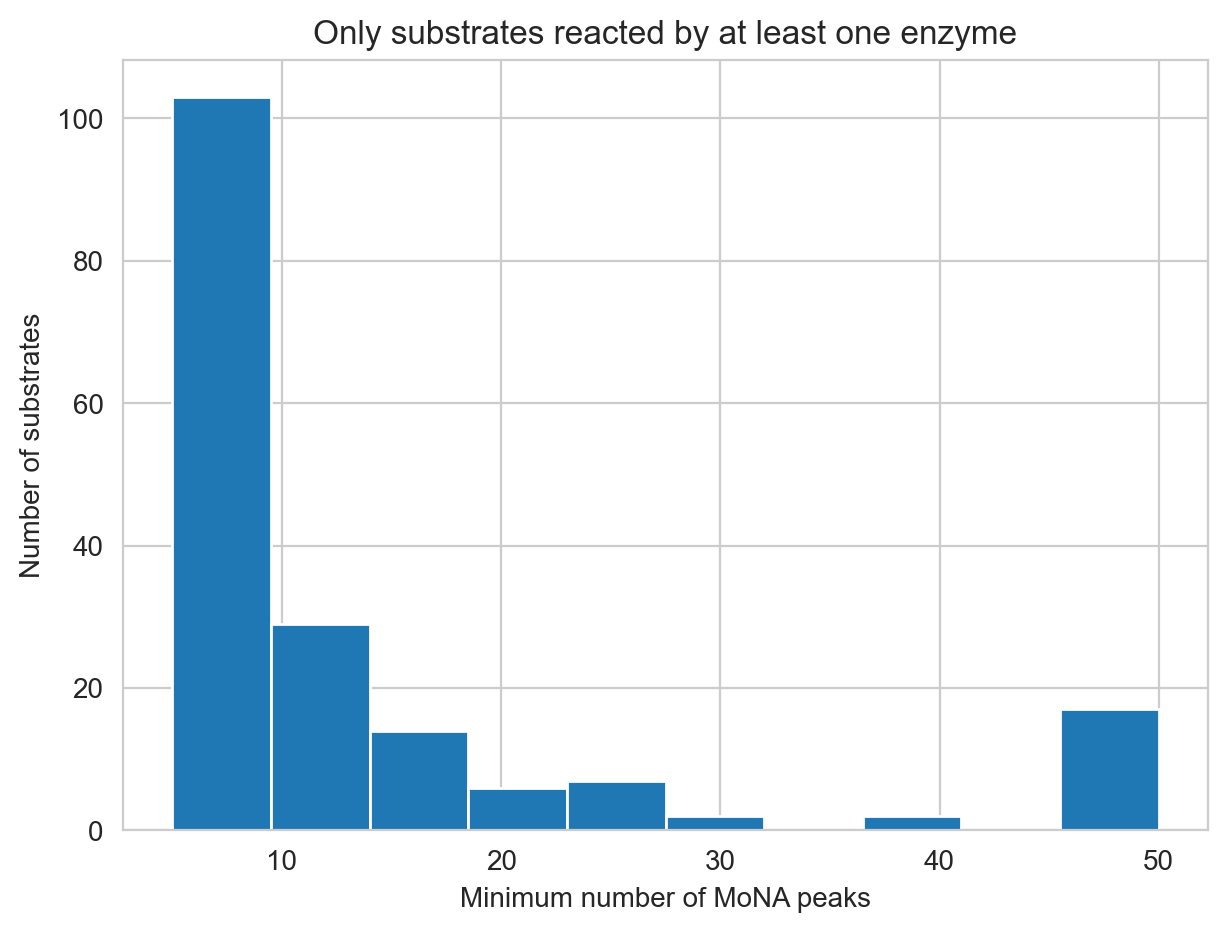

In [48]:
### Supplementary Figure 8b bottom

df_substrates[df_substrates['Name'].isin(substrates_reacted)]['min_mona_peaks'].hist()
plt.xlabel('Minimum number of MoNA peaks')
plt.ylabel('Number of substrates')
plt.title('Only substrates reacted by at least one enzyme')
savefig('MoNA_counts_3b')

In [49]:
monaentriespersubstrate = dict(df_lib['Name'].value_counts())

# Count the occurrences of each category in each group
df_counts = df[df['AUC']>0].drop_duplicates(['Name', 'Enzyme_name'])
df_counts = df_counts.groupby(['Name']).size().reset_index(name='counts')

df_counts['num_MoNA_entries'] = df_counts['Name'].apply(lambda x: monaentriespersubstrate[x])

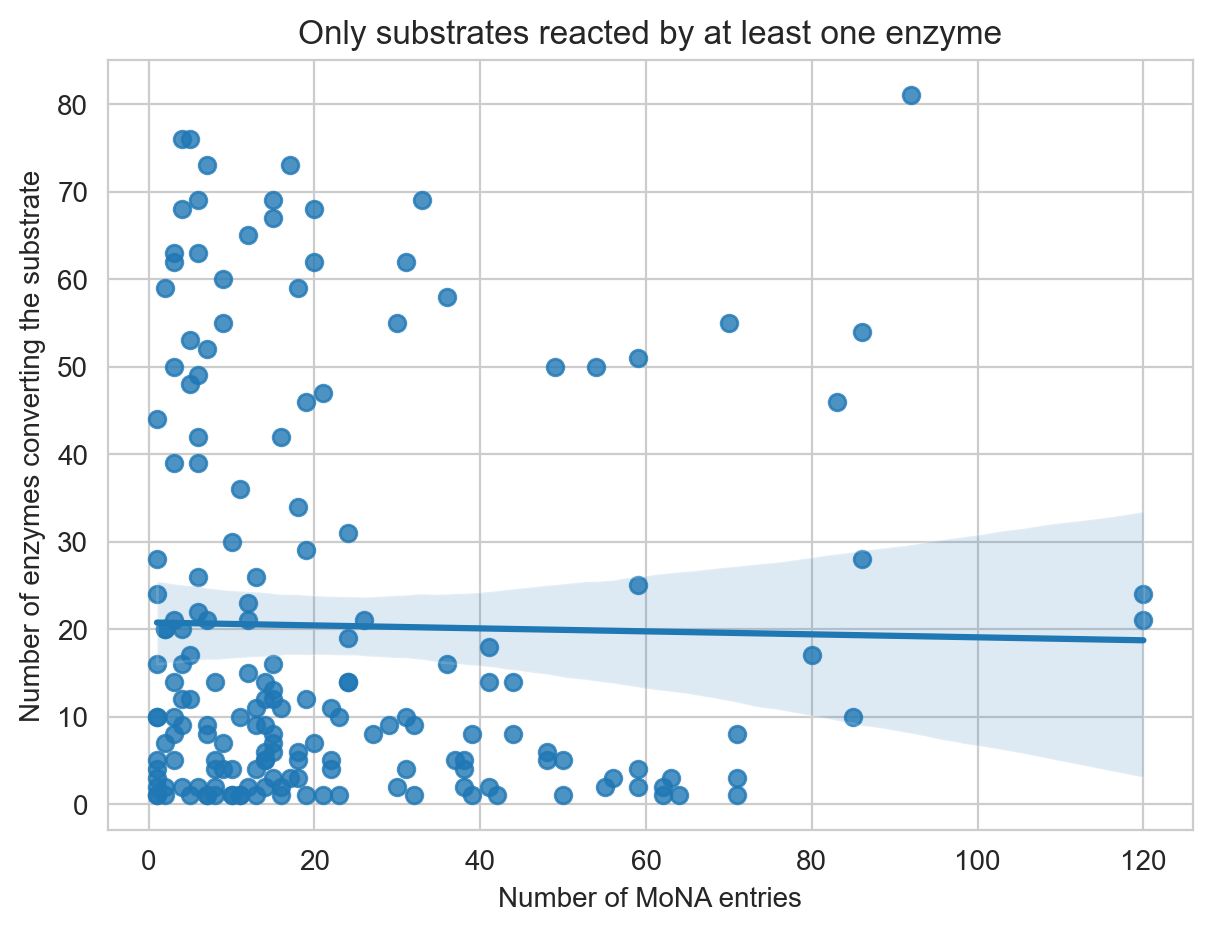

In [50]:
### Supplementary Figure 7a

plt.figure(figsize=(7,5))
sns.regplot(data=df_counts, x='num_MoNA_entries', y='counts')
plt.title('Only substrates reacted by at least one enzyme')
plt.ylabel('Number of enzymes converting the substrate')
plt.xlabel('Number of MoNA entries')
savefig('enz_subs_pairs')

In [51]:
df_counts['min_mona_peaks'] = df_counts['Name'].apply(lambda x: min_no_peaks[x])

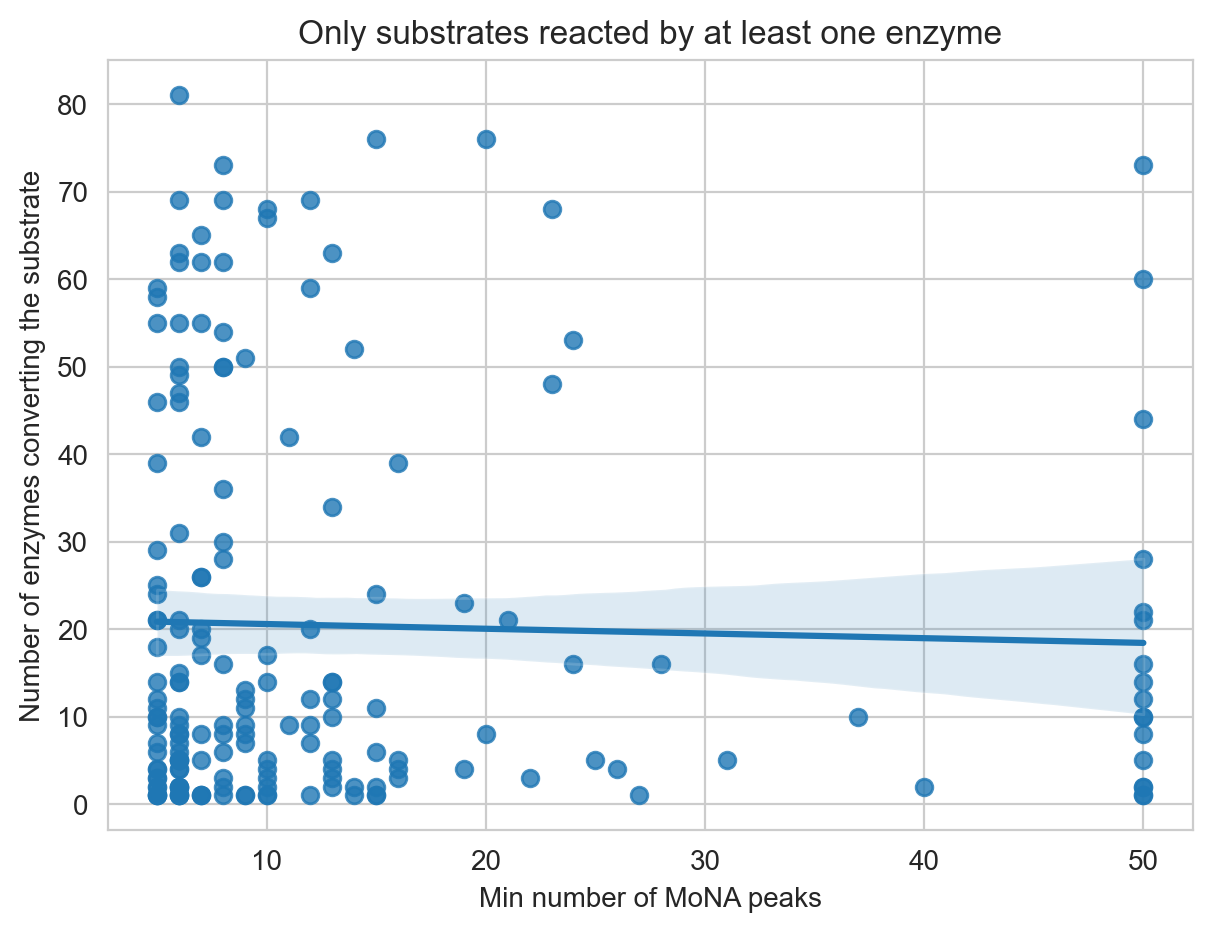

In [52]:
### Supplementary Figure 8a

plt.figure(figsize=(7,5))
sns.regplot(data=df_counts, x='min_mona_peaks', y='counts')
plt.title('Only substrates reacted by at least one enzyme')
plt.ylabel('Number of enzymes converting the substrate')
plt.xlabel('Min number of MoNA peaks')
savefig('enz_subs_pairs_b')

## Part 5 - Pivot tables summarizing active enzyme-substrate pairs by substrate superclasses

In [53]:
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm

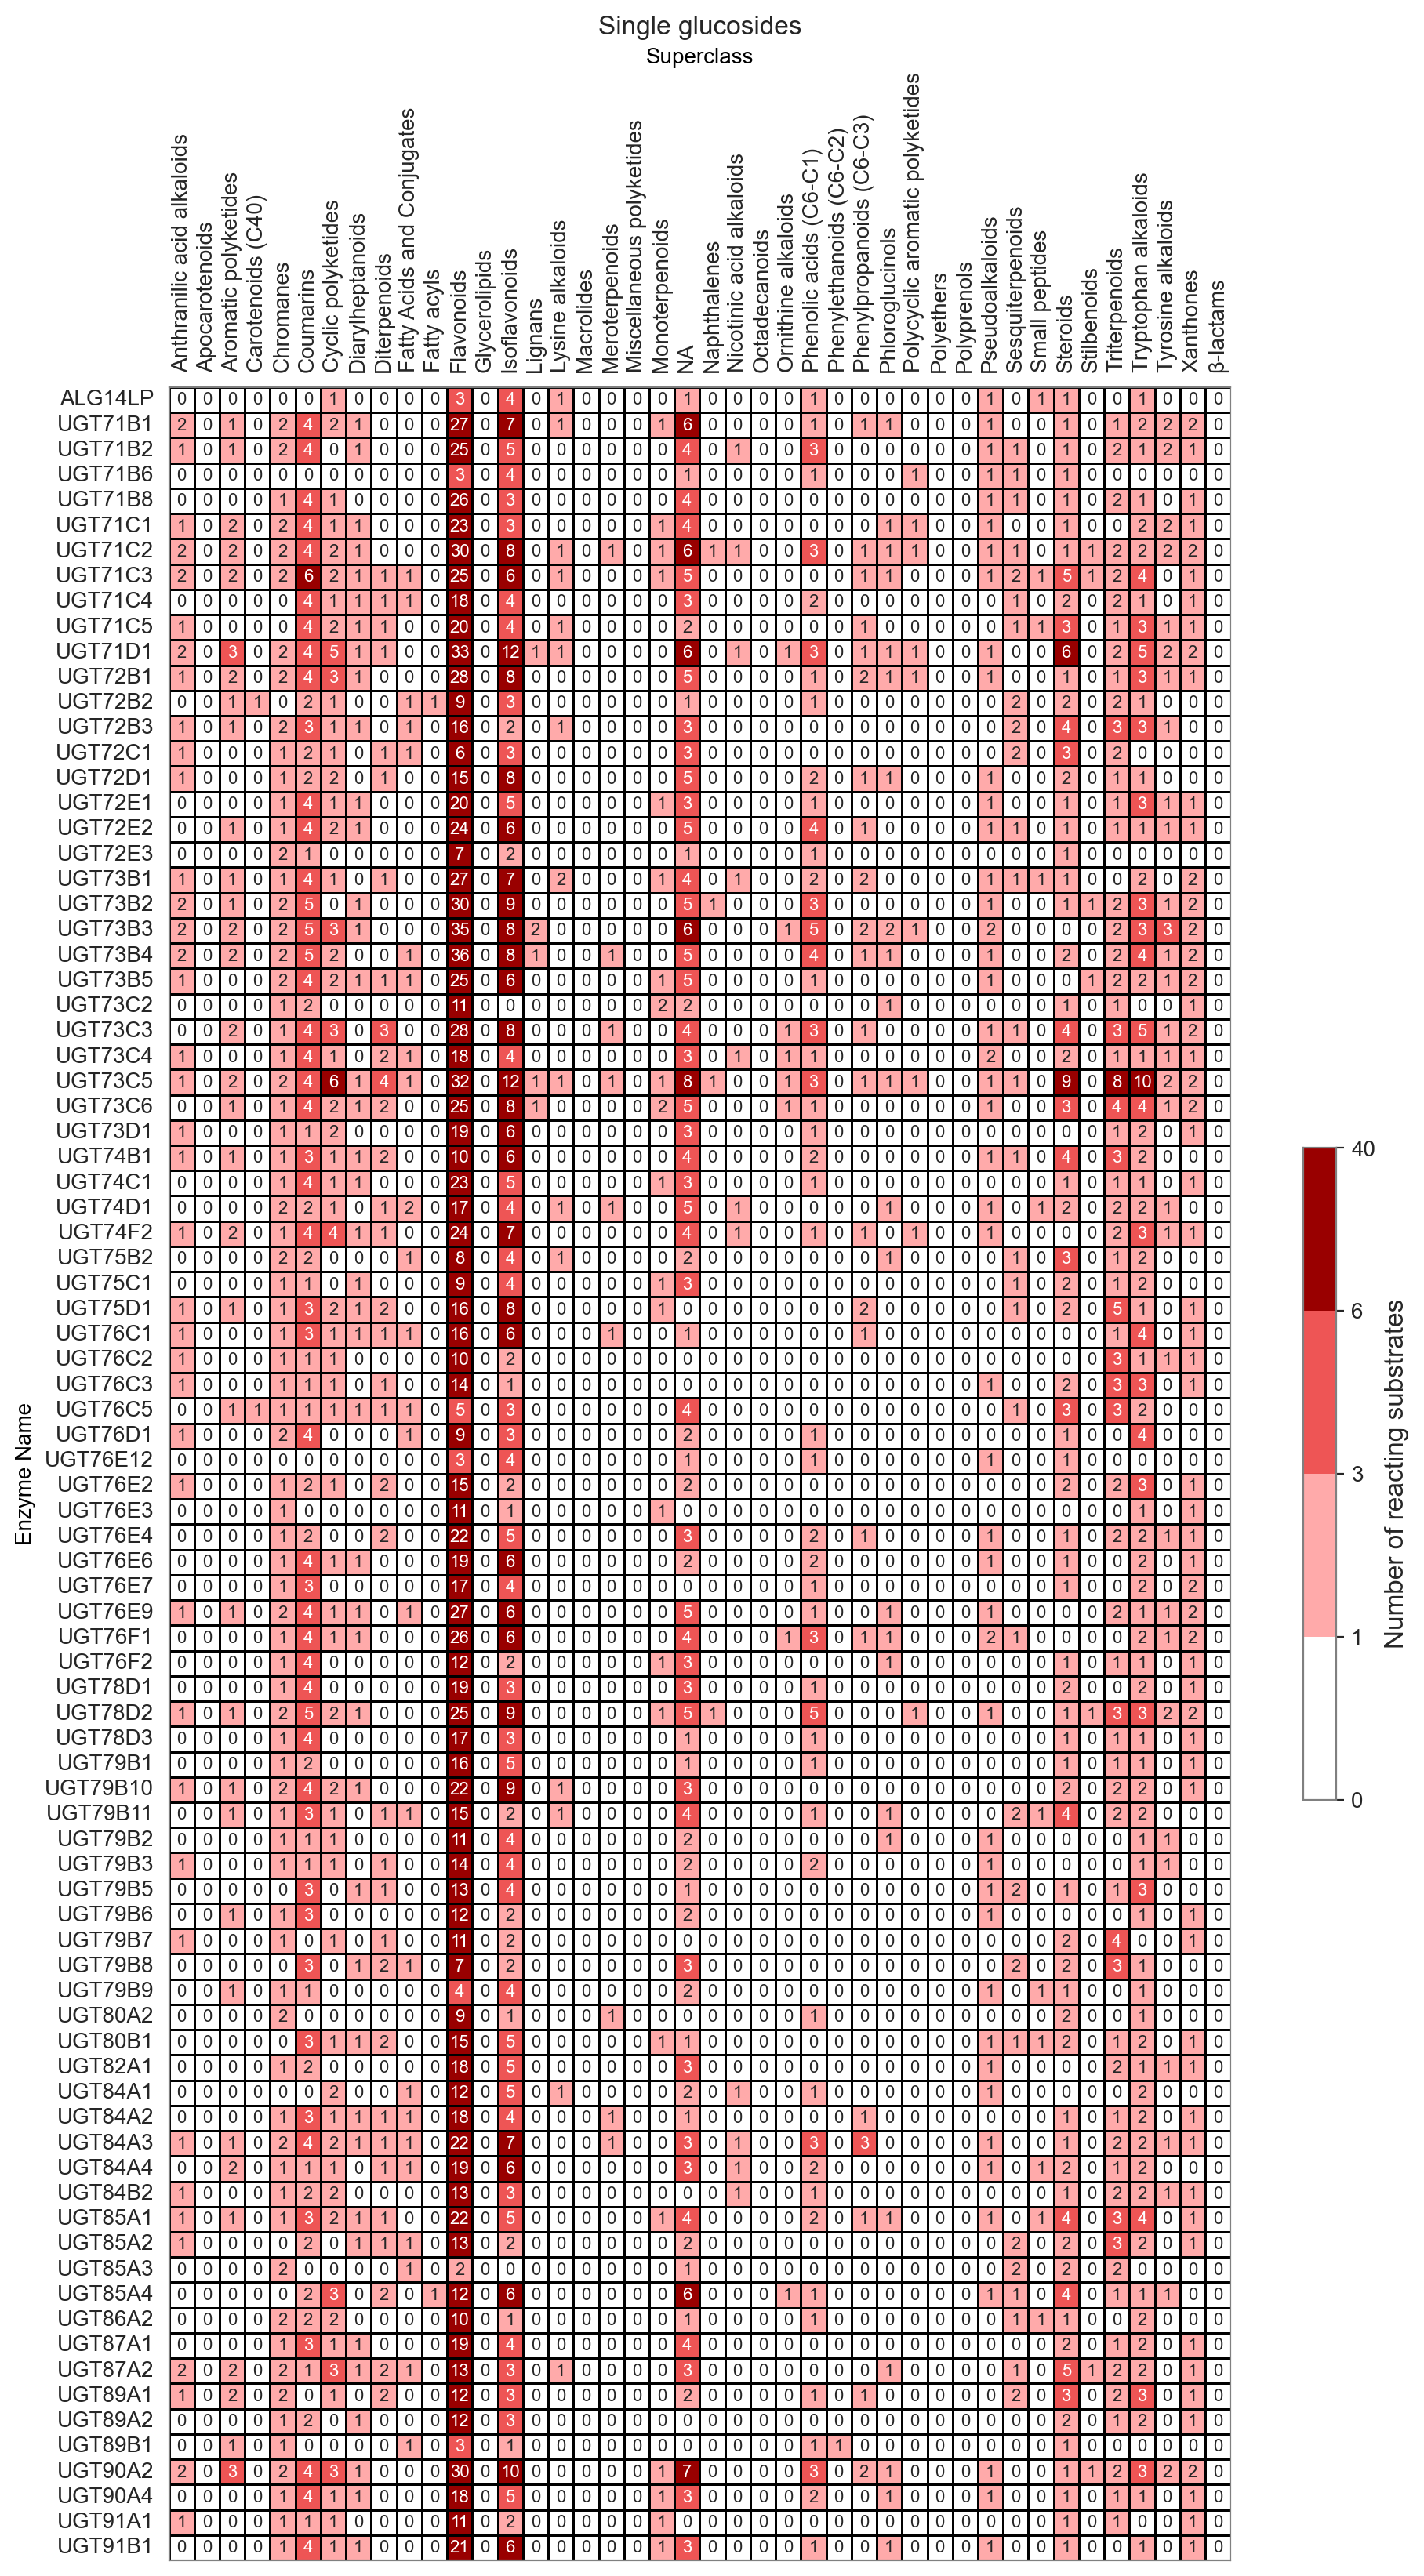

In [54]:
### Supplementary Figure 10

pivot_table = df_singles.pivot_table(columns='Enzyme_name', index='superclass', aggfunc='count', values='Name', fill_value=0)

# Assuming 'all_indices' is a list of all the indices (rows) you want in the pivot table
all_indices = df_substrates['superclass'].unique().tolist()

# Reindex the pivot table to include all the required indices, filling missing rows with zeros
pivot_table = pivot_table.reindex(all_indices, fill_value=0)
pivot_table = pivot_table.sort_index()

pivot_table = pivot_table.transpose()

plt.figure(figsize=(12, 18))

# Define the custom color map
colors = ["#ffffff", "#ffcccc", "#ff9999", "#ff6666", "#cc3333", "#990000"]  # White to dark red
custom_cmap = LinearSegmentedColormap.from_list("custom_reds", colors)

# Define the boundaries for the color transitions
bounds = [0, 1, 3, 6, 40]  # Boundaries for 0, 1-10, 11-20, 21-30, 31-40
norm = BoundaryNorm(bounds, custom_cmap.N)

# Plotting the heatmap with the custom colormap and discrete colorbar
ax = sns.heatmap(pivot_table, annot=True, fmt="d", cmap=custom_cmap, cbar=True,
                 annot_kws={"fontsize": 8}, linewidths=0.5, linecolor='black',
                 vmin=0, vmax=36, norm=norm, square=True, cbar_kws={'shrink': 0.3})

# Move the x-axis labels to the top
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labeltop=True, labelbottom=False)
plt.xticks(rotation=90)

# Add a title to the colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Number of reacting substrates', fontsize=12)

# Ensure borders are shown on all sides
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('gray')

for spine in cbar.ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('gray')

# Set axis labels to black
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.title("Single glucosides")
plt.ylabel("Enzyme Name")
plt.xlabel("Superclass")
savefig('heatmap_superclass_singles')

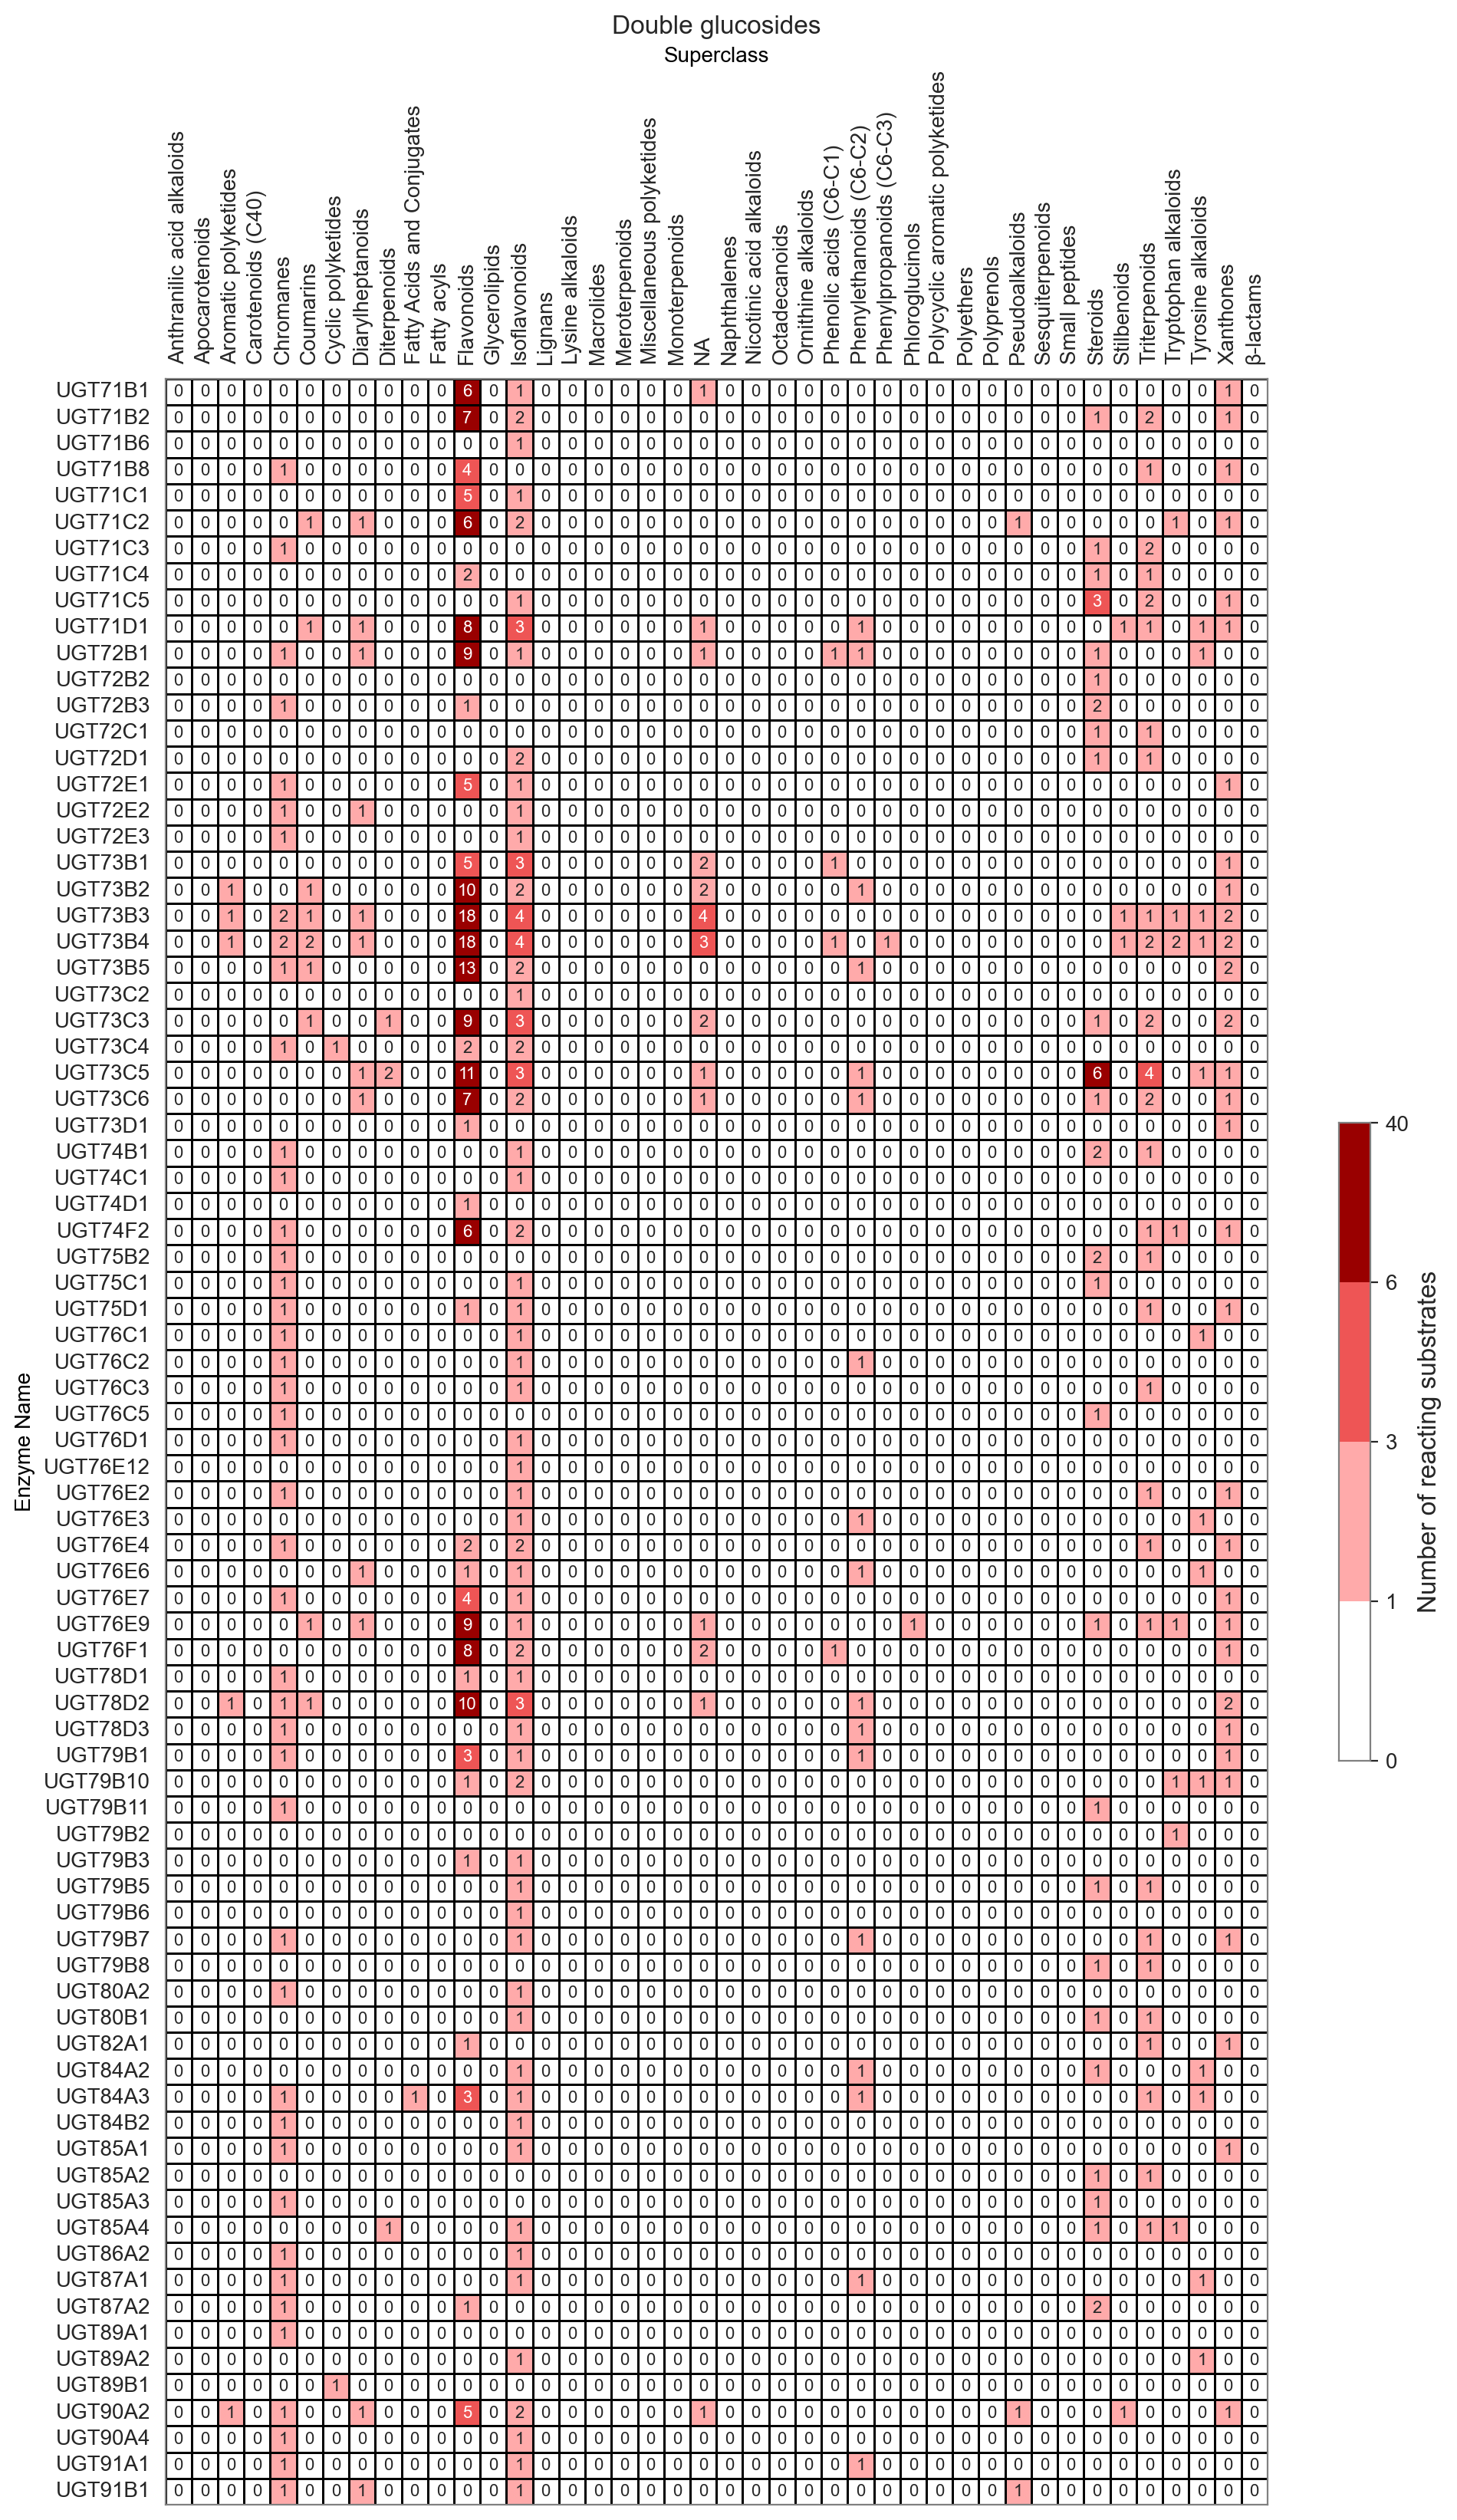

In [55]:
### Supplementary Figure 11

pivot_table = df_doubles.pivot_table(columns='Enzyme_name', index='superclass', aggfunc='count', values='CSMILES', fill_value=0)

# Assuming 'all_indices' is a list of all the indices (rows) you want in the pivot table
all_indices = df_substrates['superclass'].unique().tolist()

# Reindex the pivot table to include all the required indices, filling missing rows with zeros
pivot_table = pivot_table.reindex(all_indices, fill_value=0)
pivot_table = pivot_table.sort_index()

pivot_table = pivot_table.transpose()

plt.figure(figsize=(12, 18))

# Define the custom color map
colors = ["#ffffff", "#ffcccc", "#ff9999", "#ff6666", "#cc3333", "#990000"]  # White to dark red
custom_cmap = LinearSegmentedColormap.from_list("custom_reds", colors)

# Define the boundaries for the color transitions
bounds = [0, 1, 3, 6, 40]  # Boundaries for 0, 1-10, 11-20, 21-30, 31-40
norm = BoundaryNorm(bounds, custom_cmap.N)

# Plotting the heatmap with the custom colormap and discrete colorbar
ax = sns.heatmap(pivot_table, annot=True, fmt="d", cmap=custom_cmap, cbar=True,
                 annot_kws={"fontsize": 8}, linewidths=0.5, linecolor='black',
                 vmin=0, vmax=36, norm=norm, square=True,cbar_kws={'shrink': 0.3})

# Move the x-axis labels to the top
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labeltop=True, labelbottom=False)
plt.xticks(rotation=90)

# Add a title to the colorbar
cbar = ax.collections[0].colorbar
cbar.set_label('Number of reacting substrates', fontsize=12)

# Ensure borders are shown on all sides
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('gray')

for spine in cbar.ax.spines.values():
    spine.set_visible(True)
    spine.set_edgecolor('gray')

# Set axis labels to black
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

plt.title("Double glucosides")
plt.ylabel("Enzyme Name")
plt.xlabel("Superclass")
savefig('heatmap_superclass_doubles')

## Part 6 - PMI plots

### PMI plot of all substrates vs non-substrates

In [56]:
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors3D

def calculate_pmi(smiles, num_conformers=10, max_steps=1000):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    
    # Generate multiple conformers
    conformer_ids = AllChem.EmbedMultipleConfs(mol, numConfs=num_conformers)
    
    # Optimize each conformer and store energies
    energies = []
    for conf_id in conformer_ids:
        AllChem.MMFFOptimizeMolecule(mol, confId=conf_id, maxIters=max_steps)
        # Set up the MMFF force field for the molecule
        mp = AllChem.MMFFGetMoleculeProperties(mol)
        ff = AllChem.MMFFGetMoleculeForceField(mol, mp, confId=conf_id)
        energy = ff.CalcEnergy()
        energies.append((energy, conf_id))
    
    # Select the conformer with the lowest energy
    lowest_energy_conformer = min(energies, key=lambda x: x[0])[1]
    
    # Calculate PMIs for the lowest energy conformer
    moments = (Descriptors3D.PMI1(mol, confId=lowest_energy_conformer), 
               Descriptors3D.PMI2(mol, confId=lowest_energy_conformer), 
               Descriptors3D.PMI3(mol, confId=lowest_energy_conformer),
               )
    return moments[0]/moments[2], moments[1]/moments[2]


In [57]:
df_substrates[['I1/I3', 'I2/I3']] = df_substrates['CSMILES'].apply(calculate_pmi).apply(pd.Series)

In [58]:
picked_names = ['MEVASTATIN',
                'CURCUMIN',
                'STEVIOL',
                '18ALPHA-GLYCYRRHETINIC ACID',
                'ALEURETIC ACID',
                'ICARIIN'
]

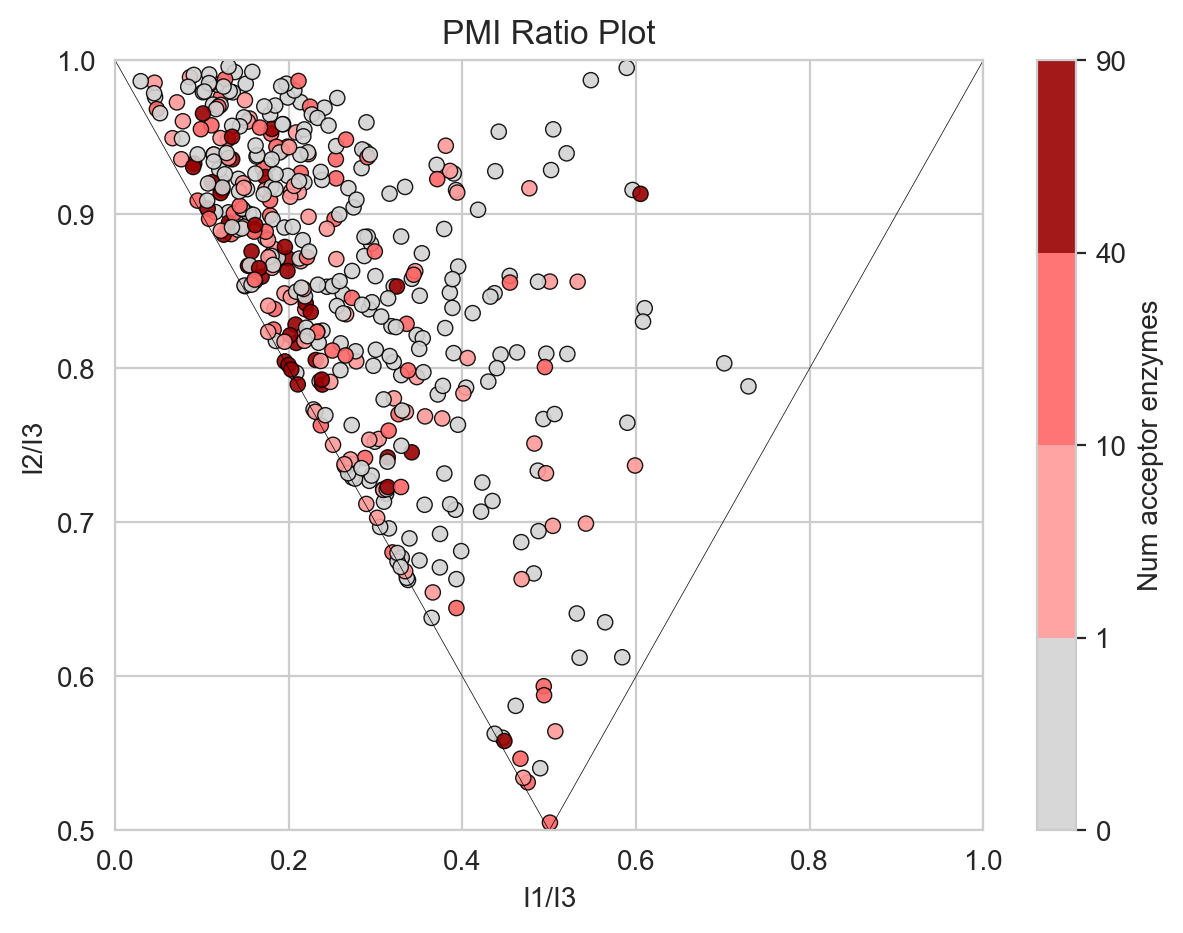

In [59]:
### Figure 2d

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the custom colormap with lighter gray and darker light red
cmap = mcolors.ListedColormap(['#d3d3d3', '#ff9999', '#ff6666', '#990000'])  # Lighter gray, darker light red, medium red, dark red
bounds = [0, 1, 10, 40, 90]  # Define boundaries for colors
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Define the sizes of the points based on the condition
sizes = [30 for x in df_substrates['num_acceptor_enzymes']]

# Plotting I2/I3 vs I1/I3
fig, ax = plt.subplots(figsize=(7, 5))

sc = ax.scatter(df_substrates['I1/I3'], 
                df_substrates['I2/I3'], 
                c=df_substrates['num_acceptor_enzymes'].to_list(), 
                cmap=cmap, 
                norm=norm, 
                s=sizes, alpha=0.9, edgecolor='k', linewidth=0.5)  # Use the size array here

# # Add annotations
# for i, name in enumerate(df_substrates['Name']):
#     if name in picked_names:  # Check if the name is not empty
#         ax.annotate(name, 
#                     (df_substrates['I1/I3'][i], df_substrates['I2/I3'][i]),
#                     ha='right',
#                     va='center', 
#                     fontsize=8, 
#                     color='black')

ax.set_xlabel('I1/I3')
ax.set_ylabel('I2/I3')
plt.colorbar(sc, label='Num acceptor enzymes', boundaries=bounds, ticks=[0, 1, 10, 40, 90])
plt.title('PMI Ratio Plot')
plt.plot([0, 0.5], [1.0, 0.5], 'k-', linewidth=0.25)
plt.plot([0.5, 1.0], [0.5, 1.0], 'k-', linewidth=0.25)
plt.plot([0., 1.], [1.0, 1.0], 'k-', linewidth=0.25)
plt.xlim([0, 1])
plt.ylim([0.5, 1])
savefig('PMI_triangle')

### PMI plot of only substrates of UGT73C5

In [60]:
df_val = pd.read_csv('../data/UGT73C5 purified enzyme validation experiment results - Sheet1.csv')
df_val = df_val.rename(columns={'SMILES':'CSMILES','Substrates_UGT73C5':'reacts_73C5'})
df_val['reacts_73C5'] = [s == 'Yes' for s in df_val['reacts_73C5']]
del df_val['Notes']

In [61]:
df_73c5 = df_sd.query('Enzyme_name=="UGT73C5"').copy()
df_tmp = df_substrates[['Name', 'CSMILES', 'I1/I3', 'I2/I3']].copy()
df_tmp['reacts_73C5'] = df_tmp['Name'].isin(df_73c5['Name'])
df_tmp['Source']='SCREEN'

In [62]:
name2csmiles = dict(zip(df_substrates['Name'], df_substrates['CSMILES']))

In [63]:
df_val['CSMILES'] = [name2csmiles[n] if n in name2csmiles else s for n, s in zip(df_val['Name'], df_val['CSMILES'])]

In [64]:
df_tmp = pd.concat([df_tmp, df_val], ignore_index=True)

In [65]:
df_tmp = df_tmp.query('reacts_73C5==True')

In [67]:
df_tmp[['I1/I3', 'I2/I3']] = df_tmp['CSMILES'].apply(calculate_pmi).apply(pd.Series)

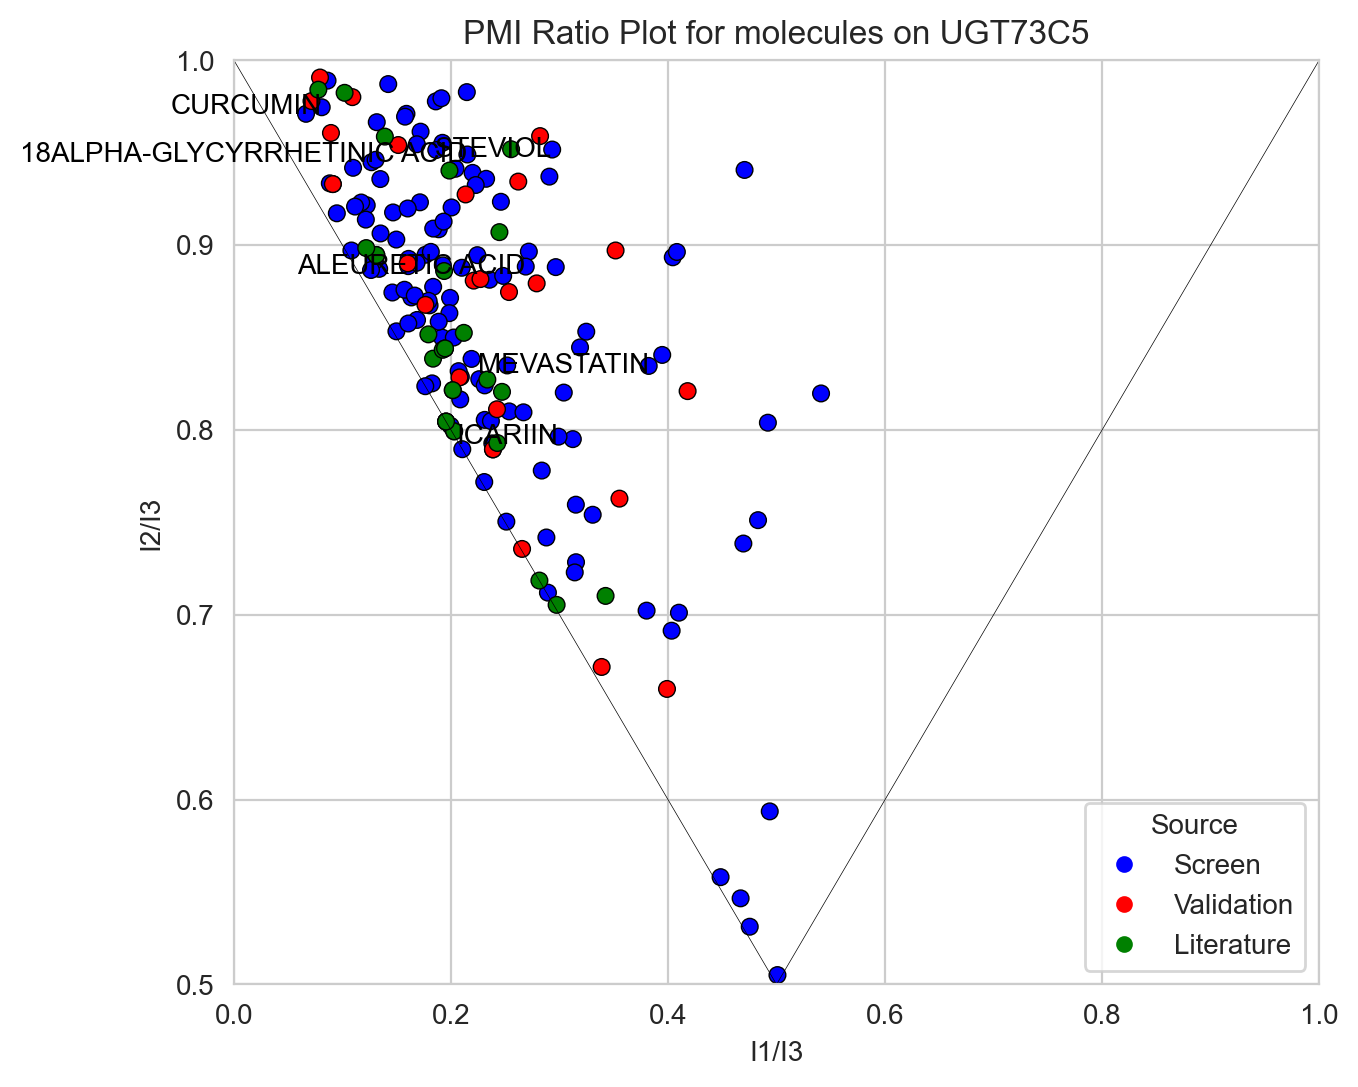

In [68]:
### Figure 3a

import matplotlib.lines as mlines

df_tmp = df_tmp.query('reacts_73C5==True')

color_mapping = {'SCREEN': 'blue', 'VALIDATION': 'red', 'LITERATURE': 'green'}
df_tmp['colors']  = df_tmp['Source'].map(color_mapping)

# Plotting I2/I3 vs I1/I3
fig, ax = plt.subplots(figsize=(7, 6))

ax.scatter(df_tmp['I1/I3'], 
            df_tmp['I2/I3'],
            c=df_tmp['colors'],
            edgecolor='k',
            linewidth=0.5)

# Add annotations
for i, name in enumerate(df_substrates['Name']):
    if name in picked_names:  # Check if the name is not empty
        ax.annotate(name, 
                    (df_tmp['I1/I3'][i], df_tmp['I2/I3'][i]),
                    ha='right',
                    va='center', 
                    fontsize=10, 
                    color='black')


# Manually create legend handles for colors
color_handles = [
    mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=5, label='Screen'),
    mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=5, label='Validation'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=5, label='Literature'),
]

# Add the color legend with a different title
legend_colors = ax.legend(handles=color_handles, title='Source', loc='lower right')


ax.set_xlabel('I1/I3')
ax.set_ylabel('I2/I3')
plt.colorbar(sc, label='Num acceptor enzymes')
plt.title('PMI Ratio Plot for molecules on UGT73C5')
plt.plot([0,0.5], [1.0,0.5], 'k-', linewidth=0.25)
plt.plot([0.5,1.0], [0.5,1.0], 'k-', linewidth=0.25)
plt.plot([0.,1.], [1.0,1.0], 'k-', linewidth=0.25)
plt.xlim([0,1])
plt.ylim([0.5,1])
savefig('PMI_triangle_73C5')

## Part 7 - Additional plots

### Check reactive substrates without alcohol or carboxylic acid groups

In [ ]:
### Not included in publication

# Define SMARTS for alcohol and carboxylic acid
alcohol_smarts = '[OX2H]'  # Alcohol group
carboxylic_acid_smarts = 'C(=O)[OX2H1]'  # Carboxylic acid group

# Compile the SMARTS patterns
alcohol_pattern = Chem.MolFromSmarts(alcohol_smarts)
carboxylic_acid_pattern = Chem.MolFromSmarts(carboxylic_acid_smarts)

# Function to check if a SMILES contains alcohol or carboxylic acid
def contains_group(smiles, pattern):
    mol = Chem.MolFromSmiles(smiles)
    return mol.HasSubstructMatch(pattern)

def count_group_occurrences(smiles, pattern):
    mol = Chem.MolFromSmiles(smiles)
    return len(mol.GetSubstructMatches(pattern))

# Filter the DataFrame
df_tmp = df_substrates[
    ~df_substrates['CSMILES'].apply(lambda x: contains_group(x, alcohol_pattern) or contains_group(x, carboxylic_acid_pattern)) &
    ~df_substrates['SMILES'].apply(lambda x: contains_group(x, alcohol_pattern) or contains_group(x, carboxylic_acid_pattern))
]

In [70]:
df_tmp[df_tmp['num_acceptor_enzymes']>0][['Name','num_acceptor_enzymes','SMILES']]

Name  num_acceptor_enzymes  \
104                      HARMINE                     8   
205                     CYTISINE                     1   
212                      HARMANE                     8   
213                       HARMOL                    60   
277                  HUPERZINE A                     2   
311                      EMETINE                     9   
381  CANTHAXANTHIN (EUGLENANONE)                     2   

                                                SMILES  
104                     CC1=NC=CC2=C1NC3=C2C=CC(=C3)OC  
205                          C1C2CNCC1C3=CC=CC(=O)N3C2  
212                         CC1=NC=CC2=C1NC3=CC=CC=C23  
213                    CC1=C2C(=C3C=CC(=O)C=C3N2)C=CN1  
277              CC=C1C2CC3=C(C1(CC(=C2)C)N)C=CC(=O)N3  
311  CC[C@H]1CN2CCC3=CC(=C(C=C3[C@@H]2C[C@@H]1C[C@@...  
381  CC1=C(C(CCC1=O)(C)C)/C=C/C(=C/C=C/C(=C/C=C/C=C...

### Check enzyme isoelectric point vs. promiscuity

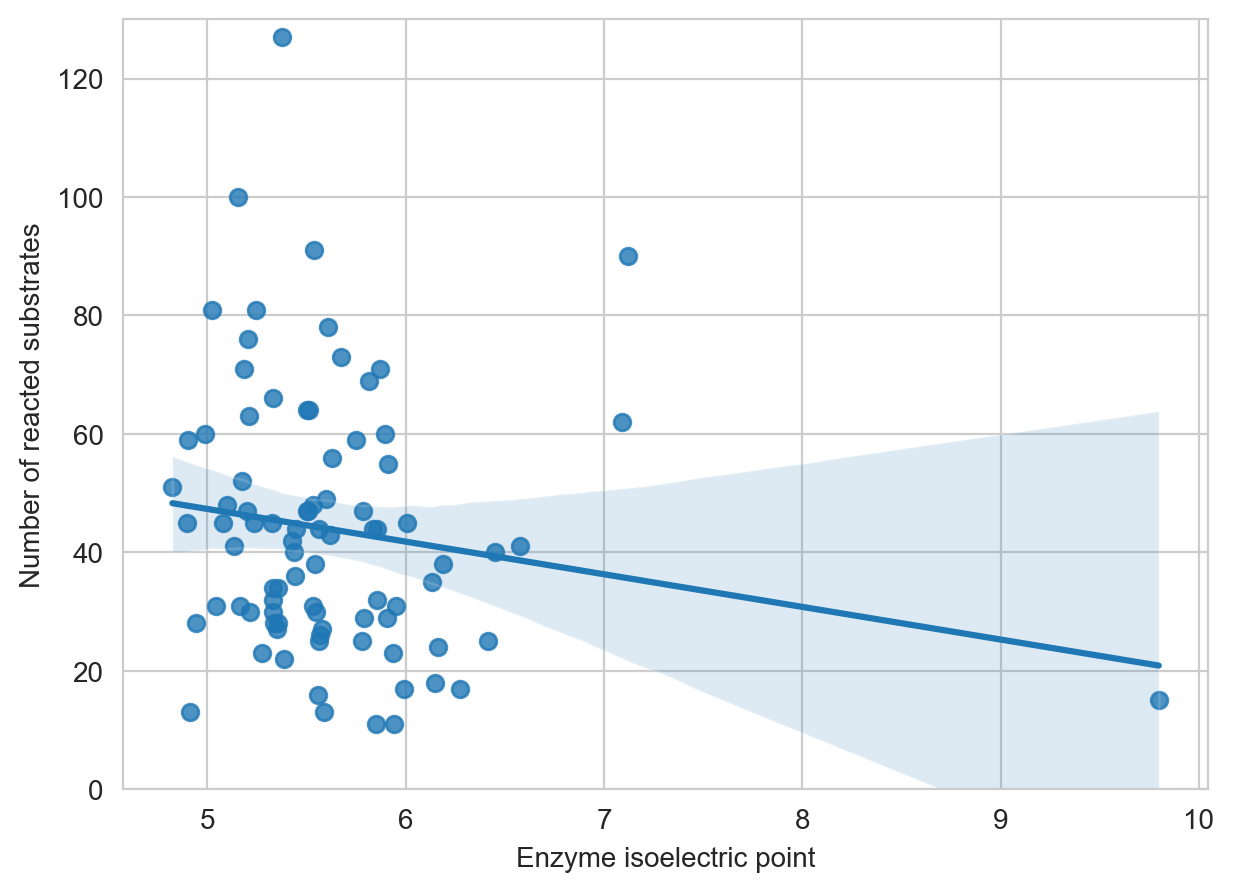

In [72]:
### Supplementary Figure 20b

sns.regplot(data=df_enz, x='Enzyme_IEP', y='N_substrates_glycosylated')
plt.ylim([0,130])
plt.ylabel('Number of reacted substrates')
plt.xlabel('Enzyme isoelectric point')
savefig('IEP')

### Check enzyme pseudoperplexity vs. promiscuity

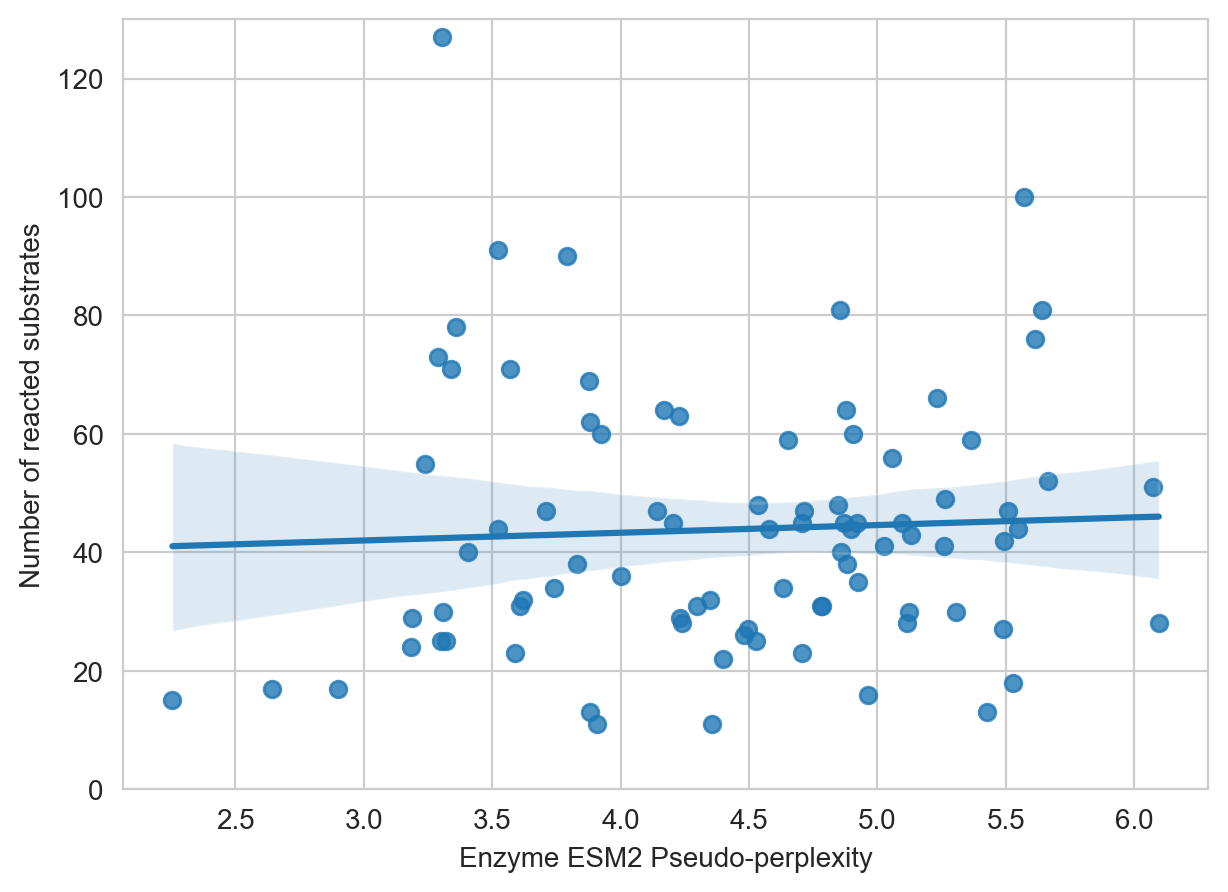

In [73]:
### Supplementary Figure 20c

sns.regplot(data=df_enz, x='ppl', y='N_substrates_glycosylated')
plt.ylim([0,130])
plt.ylabel('Number of reacted substrates')
plt.xlabel('Enzyme ESM2 Pseudo-perplexity')
savefig('PPL')

### Check for contributing sequence motifs to promiscuity

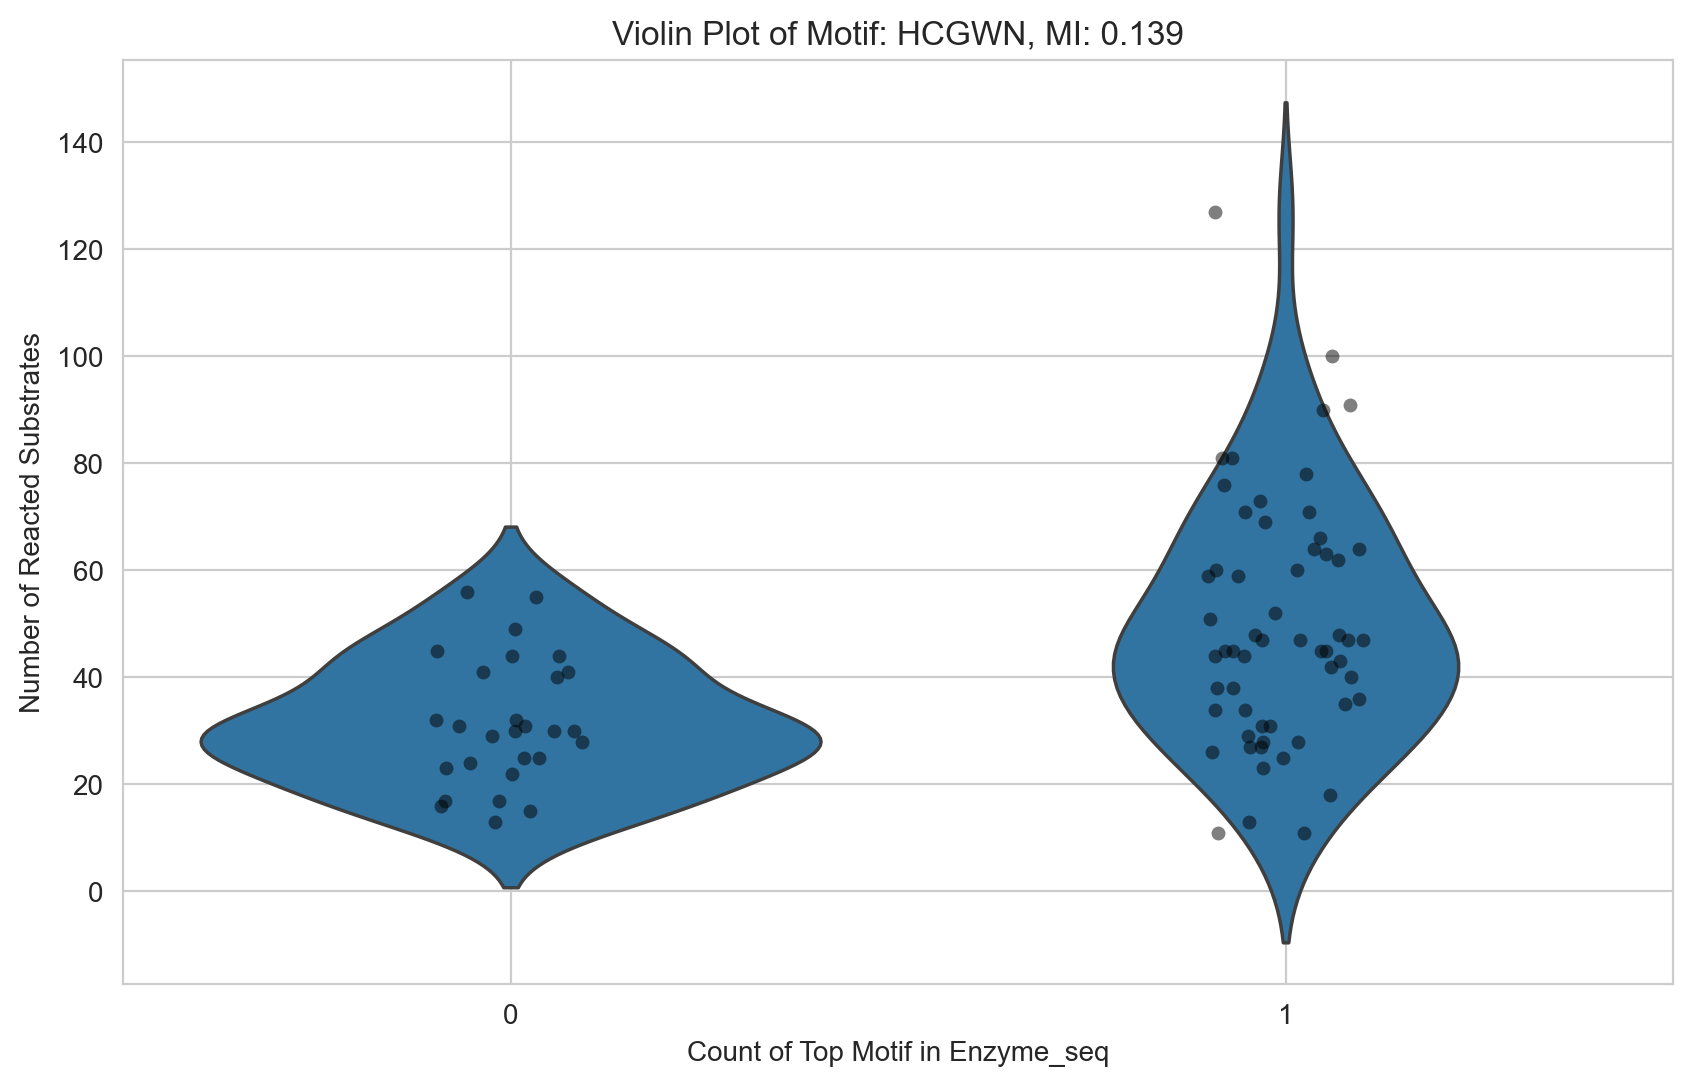

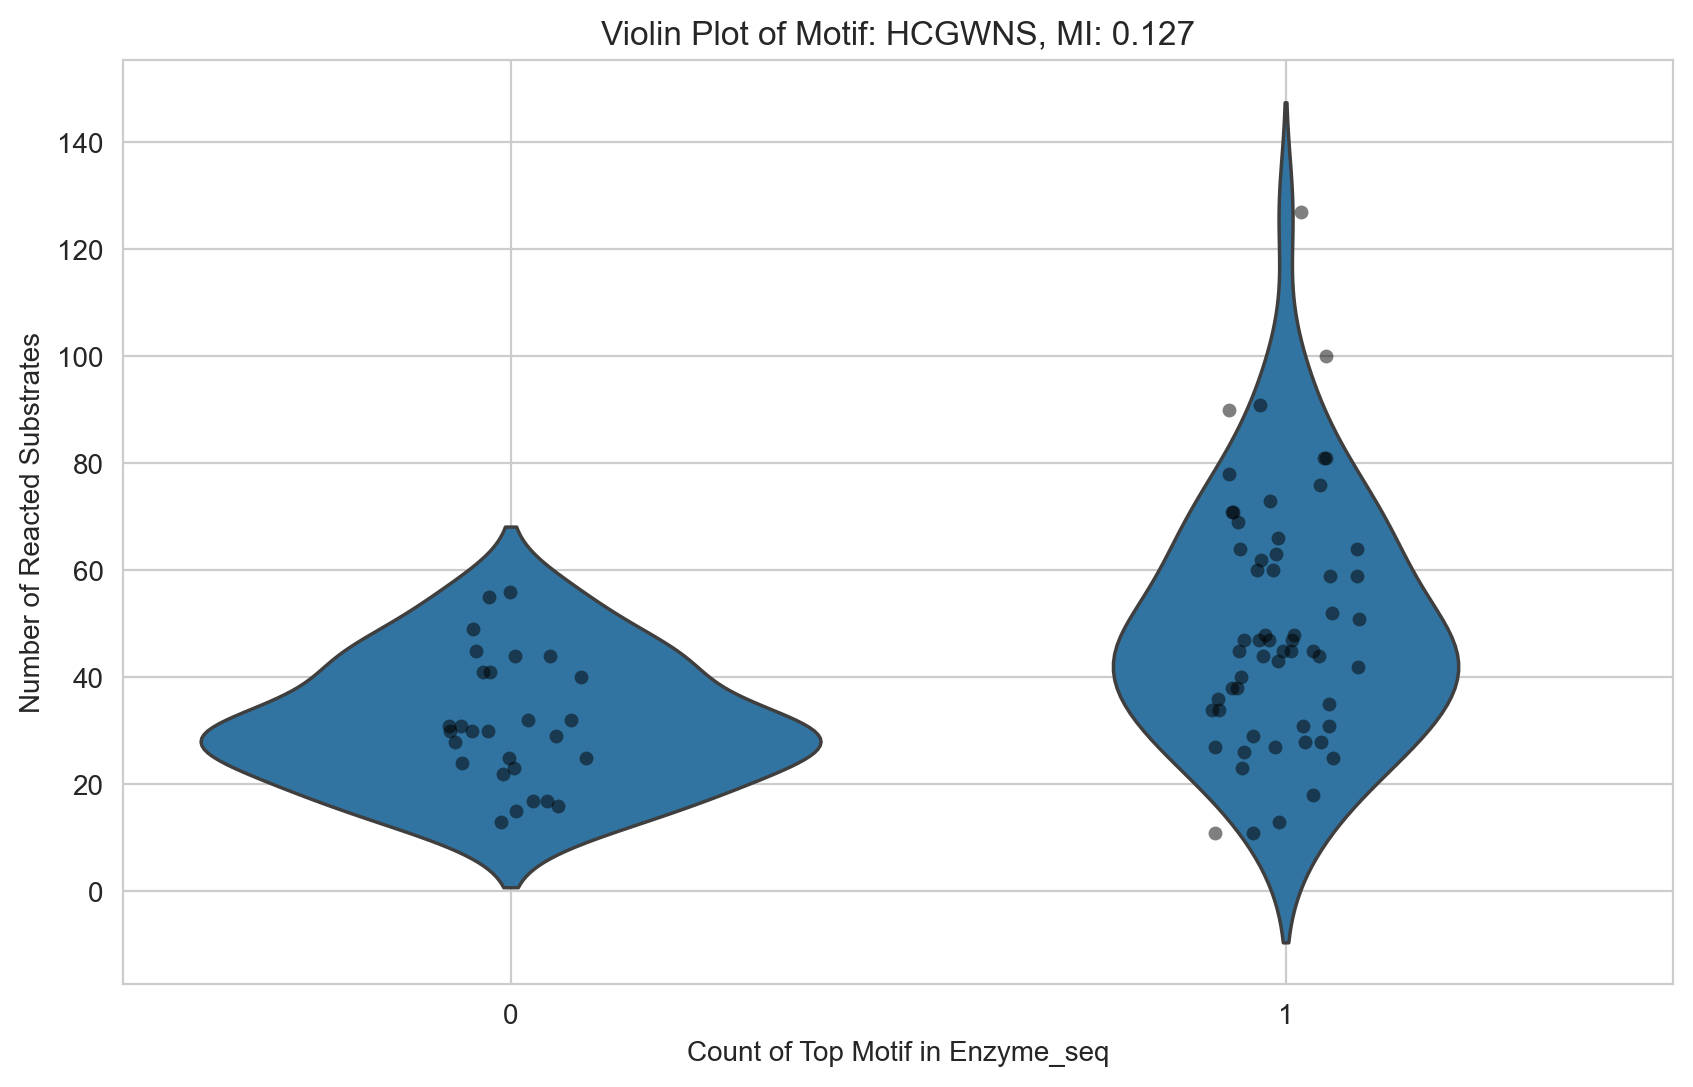

In [79]:
### Not included in publication

from sklearn.feature_selection import mutual_info_regression

df_tmp = df_enz.dropna(subset='N_substrates_glycosylated').copy()

# Function to extract k-mers
def extract_kmers(seq, k):
    return [seq[i:i+k] for i in range(len(seq) - k + 1)]

for k in (5,6):
    # Step 1: Extract k-mers for each sequence
    df_tmp[f'{k}mers'] = df_tmp['Enzyme_seq'].apply(lambda seq: extract_kmers(seq, k))

    # Step 2: Flatten and get unique k-mers
    unique_kmers = list(set([motif for sublist in df_tmp[f'{k}mers'] for motif in sublist]))

    # Step 3: Create count matrix for k-mer occurrences
    count_matrix = pd.DataFrame({
        motif: df_tmp[f'{k}mers'].apply(lambda x: x.count(motif)) for motif in unique_kmers
    })

    # Step 4: Concatenate the count matrix with the original DataFrame
    df_combined = pd.concat([df_tmp, count_matrix], axis=1)

    # Step 5: Calculate association between k-mer counts and the promiscuity values using mutual information
    X = df_combined[unique_kmers]  # The count matrix
    X = X.loc[:, X.sum(axis=0) > 10]  # Keep columns where the sum is greater than 10
    y = df_tmp['N_substrates_glycosylated']  # The values you're associating with

    # Using mutual information regression
    mi_scores = mutual_info_regression(X, y)

    # Step 6: Get the top 3 motifs based on mutual information scores
    top_motif_indices = mi_scores.argsort()[-1:][::-1]  # Indices of the top 3 motifs
    top_motifs = X.columns[top_motif_indices]
    top_mi_scores = mi_scores[top_motif_indices]

    # Step 7: Plot violin plots for each of the top motifs with jittered points
    for motif, mi_score in zip(top_motifs, top_mi_scores):
        df_combined['Top_Motif_Count'] = count_matrix[motif]

        plt.figure(figsize=(10, 6))
        sns.violinplot(x='Top_Motif_Count', y='N_substrates_glycosylated', data=df_combined, inner=None)
        sns.stripplot(x='Top_Motif_Count', y='N_substrates_glycosylated', data=df_combined, color='black', alpha=0.5, jitter=True)
        plt.title(f'Violin Plot of Motif: {motif}, MI: {mi_score:.3f}')
        plt.xlabel('Count of Top Motif in Enzyme_seq')
        plt.ylabel('Number of Reacted Substrates')
        plt.grid(True)
        plt.show()

### Check for signal intensity (area under curve) vs. cosine scores

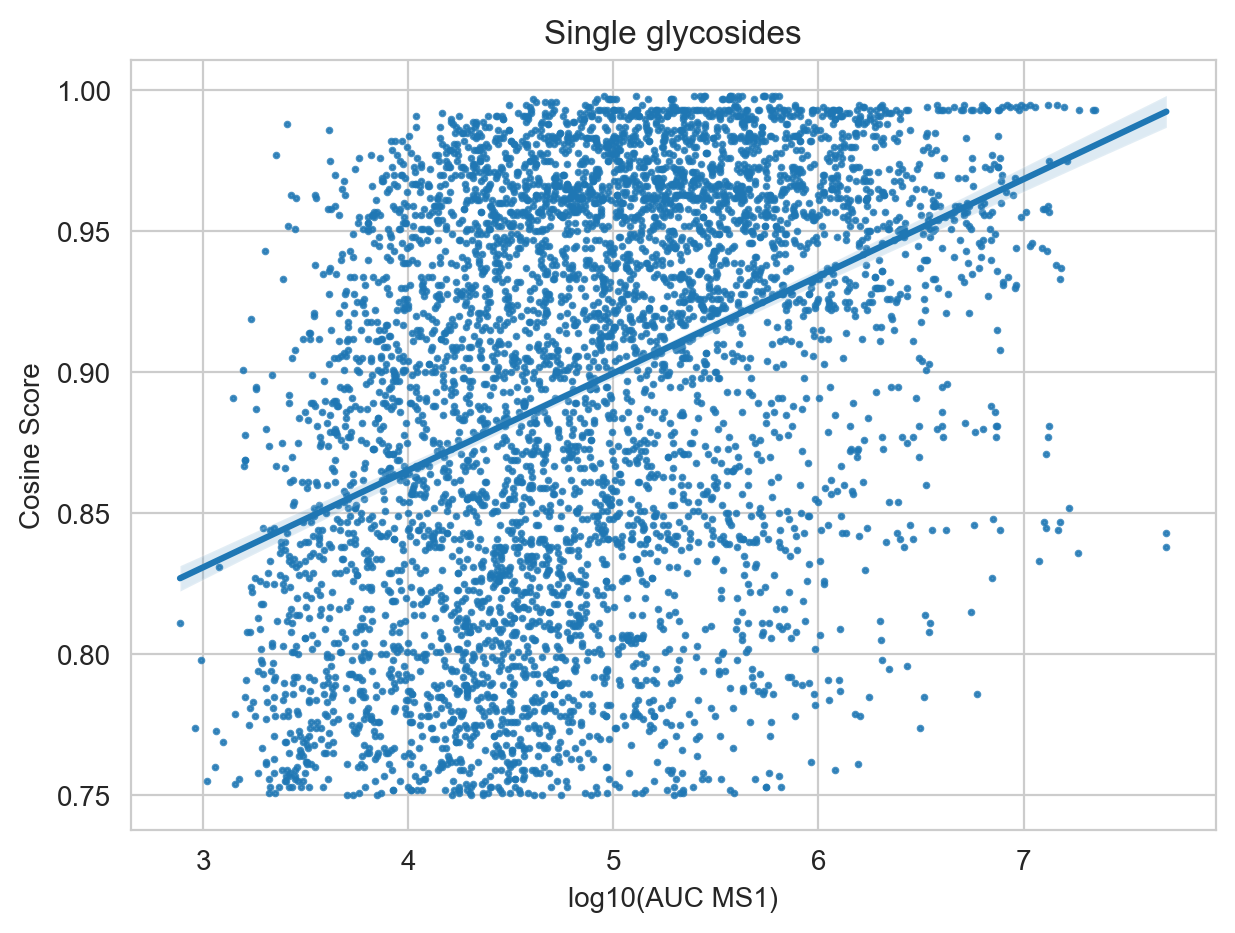

In [80]:
### Supplementary Figure 9

df_tmp = pd.read_csv(filepath_results + 'Screening_results_CosineScore_0.75.csv')
df_tmp = df_tmp[df_tmp['single_double'].str.contains('single')].copy()

df_tmp['log_AUC_single'] = np.log10(df_tmp['AUC_single'])
sns.regplot(data=df_tmp, x='log_AUC_single', y='CosineScore_single', scatter_kws={'s':3})
#plt.xscale('log')
plt.title('Single glycosides')
plt.ylabel('Cosine Score')
plt.xlabel('log10(AUC MS1)')
savefig('AUC_singles')